# RESULTADO FINAL

SetRules gerados com os dados de treino estendido

In [1]:
from temporal_relation.parse.ParseTimebankPT import TimebankPT
import warnings
import time
ini = time.time()

warnings.filterwarnings('ignore')
# warnings.simplefilter('ignore')


path_tml = r'temporal_relation\TimeBankPT\*\*.tml'
tb = TimebankPT(path_tml, dev=False, ignore_load_corpus=True)
print(tb)

tb.tr.task = 'A'
tb.tr.show_extras = False

Não foi encontrado o arquivo 'dataset/corpus.pickle'. 
Processando corpus de temporal_relation\TimeBankPT\*\*.tml.
SEQUÊNCIA PIPELINE: PORTUGUÊS
   1 -> tok2vec
   2 -> morphologizer
   3 -> parser
   4 -> lemmatizer
   5 -> attribute_ruler
   6 -> ner
   7 -> pipe_timebankpt
   8 -> merge_entities


QUANTIDADES:
   . Sentenças: 2606
   . Documentos: 182
   . Events: 7887
   . Timex3: 1409
   . TLink: 6539

SENTENÇAS: train_test
train    2258
test      348
dtype: int64


# CN2

In [2]:
tb.tr.load_rules('rules/FINAL_CN2.txt')

As regras do arquivo rules/FINAL_CN2.txt foram carregadas com sucesso. 
Total de regras: 205


## Primeira Regra Acionada 

In [3]:
tb.tr.processing_type = 'primeira_regra'  # 'primeira_regra' OR 'votacao'

### Sem estratégias

In [4]:
tb.tr.active_tlink_candidate  = False
tb.tr.active_tlink_transitive = False
tb.tr.tlink_candidate.approach = 'ML'  # 'REGRAS_TREE', 'ML' or 'REGRAS'
tb.tr.tlink_candidate.threshold = 0.3

#processa todas as sentenças da task 'A'
tb.tr.process_rules()
tb.tr.status()

STATUS PROCESSAMENTO:
Task:                       A
Quant. Regras Ativas:       205
Ordenada por:               
Ordem reversa:              False
Tipo Processamento:         primeira_regra
Tlink Candidato Ativo?      False
Tlink Transitivo Ativo?     False
Tlink Candidato Approach:   
Tlink Candidato Threshold:  
Regras processadas?         SIM


#### Treino

In [5]:
#Resumo do processamento
tb.tr.show_result = 'train'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE ['train', 'train_test']
STATUS: PRIMEIRA_REGRA | 205 regras ativas | (['train', 'train_test'])
	Sem Pares Candidato | Sem Fechamento
Acurácia Anotadas:       1092.0 de  1440.0 (75.8%)
Total Não Anotadas:                 1640.0
Acurácia Não Anotadas:   1092.0 de  3080.0 (35.5%)

TAXA COBERTURA:          1440.0 de 1,440.0 (100.0%)

Quant Regras Processadas:  157
Total Sentenças Anotadas Task A:   645
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  1440
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.838     0.578     0.684       358
           BEFORE      0.876     0.504     0.639       280
BEFORE-OR-OVERLAP      0.000     0.000     0.000         3
          OVERLAP      0.721     0.956     0.822       778
            VAGUE      0.000     0.000     0.000        21

         accuracy                          0.758      1440
        macro avg      0.487     0.408     0.429      1440
     weighted avg      0.768     0.758     0.739      1440



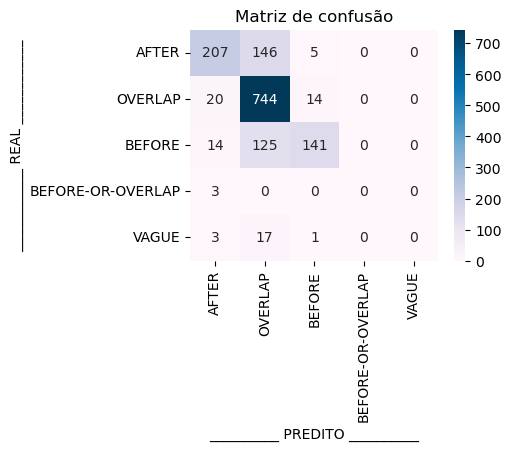

In [6]:
tb.tr.cm()

In [7]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,237,OVERLAP,1.0,4.0,5.0,7.0,33.33,80.0


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    BEFORE           20      141      161          154       44.76   
     AFTER            40      207      247          235       42.95   
     OVERLAP         288      744     1032         1251       32.59   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    BEFORE                     87.58  
     AFTER                      83.81  
     OVERLAP                    72.09

#### Teste

In [8]:
#Resumo do processamento
tb.tr.show_result = 'test'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE test
STATUS: PRIMEIRA_REGRA | 205 regras ativas | (test)
	Sem Pares Candidato | Sem Fechamento
Acurácia Anotadas:       111.0 de   169.0 (65.7%)
Total Não Anotadas:                  285.0
Acurácia Não Anotadas:   111.0 de   454.0 (24.4%)

TAXA COBERTURA:          169.0 de   169.0 (100.0%)

Quant Regras Processadas:  83
Total Sentenças Anotadas Task A:   81
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  169
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.357     0.323     0.339        31
           BEFORE      0.700     0.333     0.452        21
BEFORE-OR-OVERLAP      0.000     0.000     0.000         1
          OVERLAP      0.718     0.895     0.797       105
            VAGUE      0.000     0.000     0.000        11

         accuracy                          0.657       169
        macro avg      0.355     0.310     0.317       169
     weighted avg      0.598     0.657     0.613       169



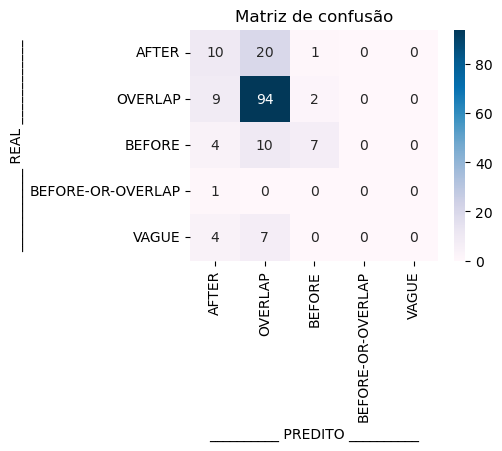

In [9]:
tb.tr.cm()

In [10]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,234,OVERLAP,2.0,0.0,2.0,2.0,0.0,0.0


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    OVERLAP          37       94      131          234       25.75   
     BEFORE            3        7       10           14       29.17   
     AFTER            18       10       28           37       15.38   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    OVERLAP                    71.76  
     BEFORE                     70.00  
     AFTER                      35.71

### +Fechamento Temporal

In [11]:
tb.tr.active_tlink_candidate  = False
tb.tr.active_tlink_transitive = True
tb.tr.tlink_candidate.approach = 'ML'  # 'REGRAS_TREE', 'ML' or 'REGRAS'
tb.tr.tlink_candidate.threshold = 0.3

#processa todas as sentenças da task 'A'
tb.tr.process_rules()
tb.tr.status()

STATUS PROCESSAMENTO:
Task:                       A
Quant. Regras Ativas:       205
Ordenada por:               
Ordem reversa:              False
Tipo Processamento:         primeira_regra
Tlink Candidato Ativo?      False
Tlink Transitivo Ativo?     True
Tlink Candidato Approach:   
Tlink Candidato Threshold:  
Regras processadas?         SIM


#### Treino

In [12]:
#Resumo do processamento
tb.tr.show_result = 'train'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE ['train', 'train_test']
STATUS: PRIMEIRA_REGRA | 205 regras ativas | (['train', 'train_test'])
	Sem Pares Candidato | Fechamento
Acurácia Anotadas:       1092.0 de  1440.0 (75.8%)
Total Não Anotadas:                 1640.0
Acurácia Não Anotadas:   1092.0 de  3080.0 (35.5%)

TAXA COBERTURA:          1440.0 de 1,440.0 (100.0%)

Quant Regras Processadas:  157
Total Sentenças Anotadas Task A:   645
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  1440
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.838     0.578     0.684       358
           BEFORE      0.876     0.504     0.639       280
BEFORE-OR-OVERLAP      0.000     0.000     0.000         3
          OVERLAP      0.721     0.956     0.822       778
            VAGUE      0.000     0.000     0.000        21

         accuracy                          0.758      1440
        macro avg      0.487     0.408     0.429      1440
     weighted avg      0.768     0.758     0.739      1440



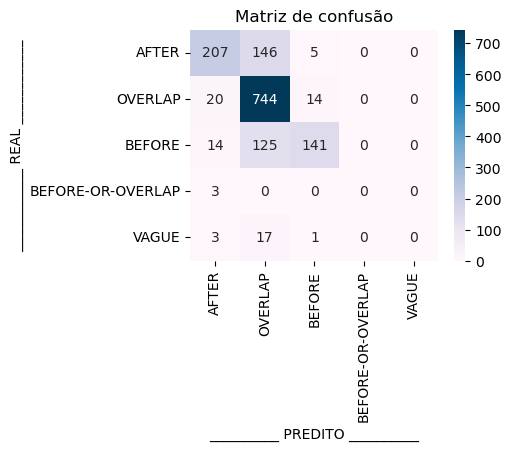

In [13]:
tb.tr.cm()

#### Teste

In [14]:
#Resumo do processamento
tb.tr.show_result = 'test'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE test
STATUS: PRIMEIRA_REGRA | 205 regras ativas | (test)
	Sem Pares Candidato | Fechamento
Acurácia Anotadas:       111.0 de   169.0 (65.7%)
Total Não Anotadas:                  285.0
Acurácia Não Anotadas:   111.0 de   454.0 (24.4%)

TAXA COBERTURA:          169.0 de   169.0 (100.0%)

Quant Regras Processadas:  83
Total Sentenças Anotadas Task A:   81
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  169
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.357     0.323     0.339        31
           BEFORE      0.700     0.333     0.452        21
BEFORE-OR-OVERLAP      0.000     0.000     0.000         1
          OVERLAP      0.718     0.895     0.797       105
            VAGUE      0.000     0.000     0.000        11

         accuracy                          0.657       169
        macro avg      0.355     0.310     0.317       169
     weighted avg      0.598     0.657     0.613       169



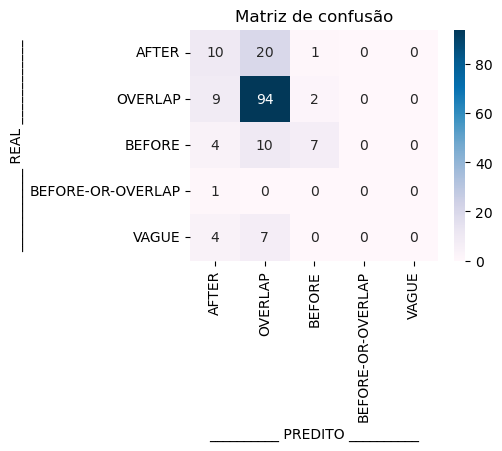

In [15]:
tb.tr.cm()

In [16]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,234,OVERLAP,2.0,0.0,2.0,2.0,0.0,0.0


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    OVERLAP          37       94      131          234       25.75   
     BEFORE            3        7       10           14       29.17   
     AFTER            18       10       28           37       15.38   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    OVERLAP                    71.76  
     BEFORE                     70.00  
     AFTER                      35.71

## Votação

In [17]:
tb.tr.processing_type = 'votacao'  # 'primeira_regra' OR 'votacao'

### Sem estratégias

In [18]:
tb.tr.active_tlink_candidate  = False
tb.tr.active_tlink_transitive = False
tb.tr.tlink_candidate.approach = 'ML'  # 'REGRAS_TREE', 'ML' or 'REGRAS'
tb.tr.tlink_candidate.threshold = 0.3

#processa todas as sentenças da task 'A'
tb.tr.process_rules()
tb.tr.status()

STATUS PROCESSAMENTO:
Task:                       A
Quant. Regras Ativas:       205
Ordenada por:               
Ordem reversa:              False
Tipo Processamento:         votacao
Tlink Candidato Ativo?      False
Tlink Transitivo Ativo?     False
Tlink Candidato Approach:   
Tlink Candidato Threshold:  
Regras processadas?         SIM


#### Treino

In [19]:
#Resumo do processamento
tb.tr.show_result = 'train'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE ['train', 'train_test']
STATUS: VOTACAO | 205 regras ativas | (['train', 'train_test'])
	Sem Pares Candidato | Sem Fechamento
Acurácia Anotadas:       930.0 de  1440.0 (64.6%)
Total Não Anotadas:                 1640.0
Acurácia Não Anotadas:   930.0 de  3080.0 (30.2%)

TAXA COBERTURA:          1440.0 de 1,440.0 (100.0%)

Quant Regras Processadas:  131
Total Sentenças Anotadas Task A:   645
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  1440
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.876     0.278     0.422       356
           BEFORE      0.931     0.196     0.324       275
BEFORE-OR-OVERLAP      0.000     0.000     0.000         1
          OVERLAP      0.612     0.987     0.756       787
            VAGUE      0.000     0.000     0.000        21

         accuracy                          0.646      1440
        macro avg      0.484     0.292     0.300      1440
     weighted avg      0.729     0.646     0.579      1440



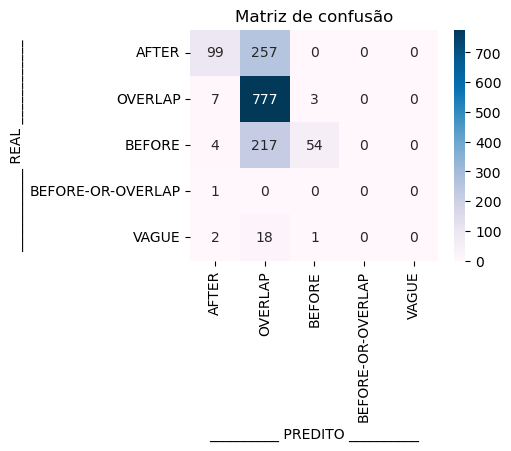

In [20]:
tb.tr.cm()

In [21]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,237,OVERLAP,1.0,4.0,5.0,7.0,33.33,80.0


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    BEFORE            4       54       58           36       57.45   
     AFTER            14       99      113           83       50.51   
     OVERLAP         492      777     1269         1521       27.85   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    BEFORE                     93.10  
     AFTER                      87.61  
     OVERLAP                    61.23

#### Teste

In [22]:
#Resumo do processamento
tb.tr.show_result = 'test'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE test
STATUS: VOTACAO | 205 regras ativas | (test)
	Sem Pares Candidato | Sem Fechamento
Acurácia Anotadas:       110.0 de   169.0 (65.1%)
Total Não Anotadas:                  285.0
Acurácia Não Anotadas:   110.0 de   454.0 (24.2%)

TAXA COBERTURA:          169.0 de   169.0 (100.0%)

Quant Regras Processadas:  67
Total Sentenças Anotadas Task A:   81
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  169
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.389     0.233     0.292        30
           BEFORE      0.667     0.105     0.182        19
BEFORE-OR-OVERLAP      0.000     0.000     0.000         1
          OVERLAP      0.682     0.935     0.789       108
            VAGUE      0.000     0.000     0.000        11

         accuracy                          0.651       169
        macro avg      0.348     0.255     0.253       169
     weighted avg      0.580     0.651     0.576       169



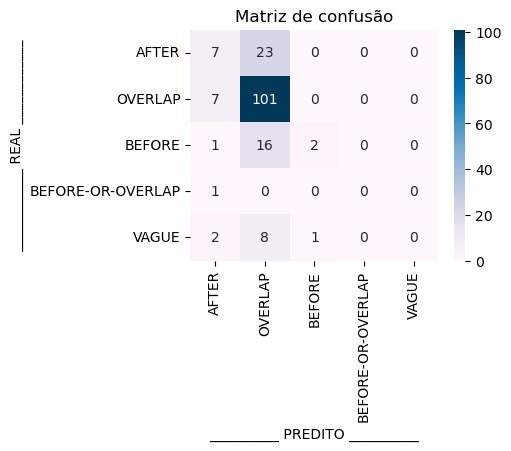

In [23]:
tb.tr.cm()

In [24]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,234,OVERLAP,2.0,2.0,4.0,9.0,15.38,50.0


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    OVERLAP          47      101      148          273       23.99   
     BEFORE            1        2        3            1       50.00   
     AFTER            11        7       18           11       24.14   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    OVERLAP                    68.24  
     BEFORE                     66.67  
     AFTER                      38.89

### +Fechamento Temporal

In [25]:
tb.tr.active_tlink_candidate  = False
tb.tr.active_tlink_transitive = True
tb.tr.tlink_candidate.approach = 'ML'  # 'REGRAS_TREE', 'ML' or 'REGRAS'
tb.tr.tlink_candidate.threshold = 0.3

#processa todas as sentenças da task 'A'
tb.tr.process_rules()
tb.tr.status()

STATUS PROCESSAMENTO:
Task:                       A
Quant. Regras Ativas:       205
Ordenada por:               
Ordem reversa:              False
Tipo Processamento:         votacao
Tlink Candidato Ativo?      False
Tlink Transitivo Ativo?     True
Tlink Candidato Approach:   
Tlink Candidato Threshold:  
Regras processadas?         SIM


#### Treino

In [26]:
#Resumo do processamento
tb.tr.show_result = 'train'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE ['train', 'train_test']
STATUS: VOTACAO | 205 regras ativas | (['train', 'train_test'])
	Sem Pares Candidato | Fechamento
Acurácia Anotadas:       930.0 de  1440.0 (64.6%)
Total Não Anotadas:                 1640.0
Acurácia Não Anotadas:   930.0 de  3080.0 (30.2%)

TAXA COBERTURA:          1440.0 de 1,440.0 (100.0%)

Quant Regras Processadas:  131
Total Sentenças Anotadas Task A:   645
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  1440
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.876     0.278     0.422       356
           BEFORE      0.931     0.196     0.324       275
BEFORE-OR-OVERLAP      0.000     0.000     0.000         1
          OVERLAP      0.612     0.987     0.756       787
            VAGUE      0.000     0.000     0.000        21

         accuracy                          0.646      1440
        macro avg      0.484     0.292     0.300      1440
     weighted avg      0.729     0.646     0.579      1440



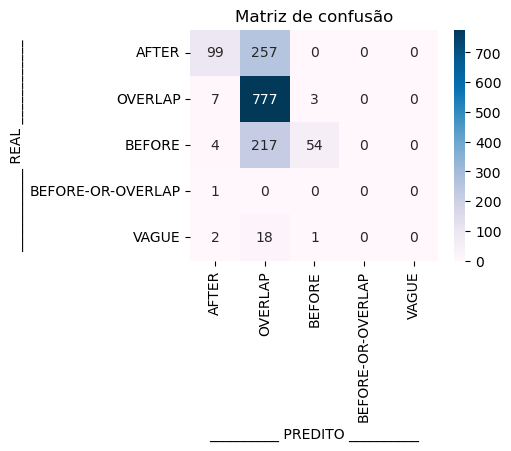

In [27]:
tb.tr.cm()

#### Teste

In [28]:
#Resumo do processamento
tb.tr.show_result = 'test'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE test
STATUS: VOTACAO | 205 regras ativas | (test)
	Sem Pares Candidato | Fechamento
Acurácia Anotadas:       110.0 de   169.0 (65.1%)
Total Não Anotadas:                  285.0
Acurácia Não Anotadas:   110.0 de   454.0 (24.2%)

TAXA COBERTURA:          169.0 de   169.0 (100.0%)

Quant Regras Processadas:  67
Total Sentenças Anotadas Task A:   81
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  169
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.389     0.233     0.292        30
           BEFORE      0.667     0.105     0.182        19
BEFORE-OR-OVERLAP      0.000     0.000     0.000         1
          OVERLAP      0.682     0.935     0.789       108
            VAGUE      0.000     0.000     0.000        11

         accuracy                          0.651       169
        macro avg      0.348     0.255     0.253       169
     weighted avg      0.580     0.651     0.576       169



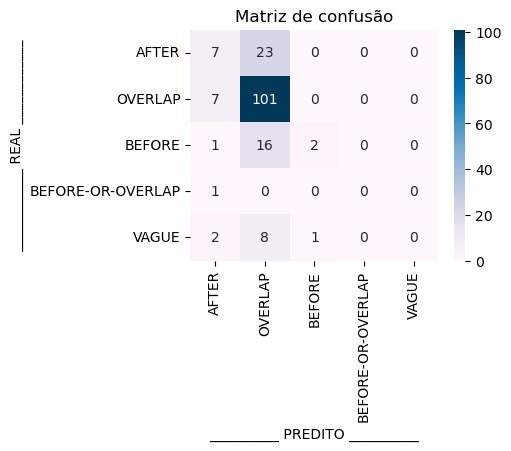

In [29]:
tb.tr.cm()

In [30]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,234,OVERLAP,2.0,2.0,4.0,9.0,15.38,50.0


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    OVERLAP          47      101      148          273       23.99   
     BEFORE            1        2        3            1       50.00   
     AFTER            11        7       18           11       24.14   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    OVERLAP                    68.24  
     BEFORE                     66.67  
     AFTER                      38.89

# CBA

In [31]:
tb.tr.load_rules('rules/FINAL_CBA.txt')

As regras do arquivo rules/FINAL_CBA.txt foram carregadas com sucesso. 
Total de regras: 568


## Primeira Regra Acionada 

In [32]:
tb.tr.processing_type = 'primeira_regra'  # 'primeira_regra' OR 'votacao'

### Sem estratégias

In [33]:
tb.tr.active_tlink_candidate  = False
tb.tr.active_tlink_transitive = False
tb.tr.tlink_candidate.approach = 'ML'  # 'REGRAS_TREE', 'ML' or 'REGRAS'
tb.tr.tlink_candidate.threshold = 0.3

#processa todas as sentenças da task 'A'
tb.tr.process_rules()
tb.tr.status()

STATUS PROCESSAMENTO:
Task:                       A
Quant. Regras Ativas:       568
Ordenada por:               
Ordem reversa:              False
Tipo Processamento:         primeira_regra
Tlink Candidato Ativo?      False
Tlink Transitivo Ativo?     False
Tlink Candidato Approach:   
Tlink Candidato Threshold:  
Regras processadas?         SIM


#### Treino

In [34]:
#Resumo do processamento
tb.tr.show_result = 'train'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE ['train', 'train_test']
STATUS: PRIMEIRA_REGRA | 568 regras ativas | (['train', 'train_test'])
	Sem Pares Candidato | Sem Fechamento
Acurácia Anotadas:       1337.0 de  1440.0 (92.8%)
Total Não Anotadas:                 1640.0
Acurácia Não Anotadas:   1337.0 de  3080.0 (43.4%)

TAXA COBERTURA:          1440.0 de 1,440.0 (100.0%)

Quant Regras Processadas:  568
Total Sentenças Anotadas Task A:   645
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  1440
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.903     0.945     0.924       366
           BEFORE      0.934     0.834     0.882       290
BEFORE-OR-OVERLAP      0.000     0.000     0.000         6
          OVERLAP      0.939     0.996     0.966       752
 OVERLAP-OR-AFTER      0.000     0.000     0.000         5
            VAGUE      0.000     0.000     0.000        21

         accuracy                          0.928      1440
        macro avg      0.463     0.463     0.462      1440
     weighted avg      0.908     0.928     0.917      1440



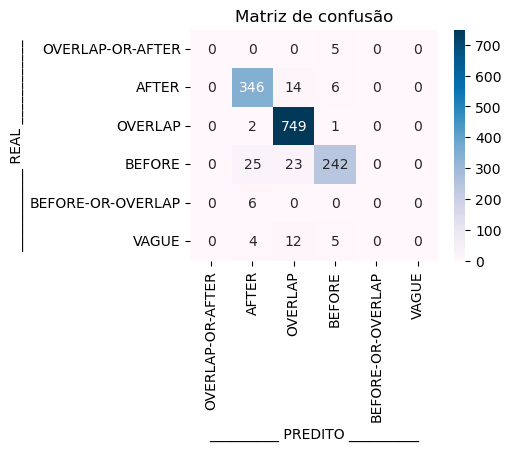

In [35]:
tb.tr.cm()

In [36]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,568,OVERLAP,11.0,21.0,32.0,120.0,13.82,65.62


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    OVERLAP          49      749      798         1169       38.08   
     BEFORE           17      242      259          222       50.31   
     AFTER            37      346      383          249       54.75   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    OVERLAP                    93.86  
     BEFORE                     93.44  
     AFTER                      90.34

#### Teste

In [37]:
#Resumo do processamento
tb.tr.show_result = 'test'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE test
STATUS: PRIMEIRA_REGRA | 568 regras ativas | (test)
	Sem Pares Candidato | Sem Fechamento
Acurácia Anotadas:       106.0 de   169.0 (62.7%)
Total Não Anotadas:                  285.0
Acurácia Não Anotadas:   106.0 de   454.0 (23.3%)

TAXA COBERTURA:          169.0 de   169.0 (100.0%)

Quant Regras Processadas:  208
Total Sentenças Anotadas Task A:   81
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  169
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.314     0.367     0.338        30
           BEFORE      0.438     0.350     0.389        20
BEFORE-OR-OVERLAP      0.000     0.000     0.000         1
          OVERLAP      0.746     0.830     0.786       106
 OVERLAP-OR-AFTER      0.000     0.000     0.000         1
            VAGUE      0.000     0.000     0.000        11

         accuracy                          0.627       169
        macro avg      0.250     0.258     0.252       169
     weighted avg      0.575     0.627     0.599       169



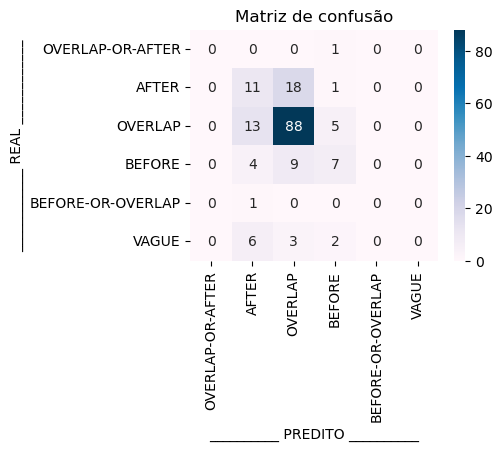

In [38]:
tb.tr.cm()

In [39]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,568,OVERLAP,3.0,6.0,9.0,26.0,17.14,66.67


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    OVERLAP          30       88      118          192       28.39   
     BEFORE            9        7       16           33       14.29   
     AFTER            24       11       35           60       11.58   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    OVERLAP                    74.58  
     BEFORE                     43.75  
     AFTER                      31.43

### +Fechamento Temporal

In [40]:
tb.tr.active_tlink_candidate  = False
tb.tr.active_tlink_transitive = True
tb.tr.tlink_candidate.approach = 'ML'  # 'REGRAS_TREE', 'ML' or 'REGRAS'
tb.tr.tlink_candidate.threshold = 0.3

#processa todas as sentenças da task 'A'
tb.tr.process_rules()
tb.tr.status()

STATUS PROCESSAMENTO:
Task:                       A
Quant. Regras Ativas:       568
Ordenada por:               
Ordem reversa:              False
Tipo Processamento:         primeira_regra
Tlink Candidato Ativo?      False
Tlink Transitivo Ativo?     True
Tlink Candidato Approach:   
Tlink Candidato Threshold:  
Regras processadas?         SIM


#### Treino

In [41]:
#Resumo do processamento
tb.tr.show_result = 'train'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE ['train', 'train_test']
STATUS: PRIMEIRA_REGRA | 568 regras ativas | (['train', 'train_test'])
	Sem Pares Candidato | Fechamento
Acurácia Anotadas:       1337.0 de  1440.0 (92.8%)
Total Não Anotadas:                 1640.0
Acurácia Não Anotadas:   1337.0 de  3080.0 (43.4%)

TAXA COBERTURA:          1440.0 de 1,440.0 (100.0%)

Quant Regras Processadas:  568
Total Sentenças Anotadas Task A:   645
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  1440
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.903     0.945     0.924       366
           BEFORE      0.934     0.834     0.882       290
BEFORE-OR-OVERLAP      0.000     0.000     0.000         6
          OVERLAP      0.939     0.996     0.966       752
 OVERLAP-OR-AFTER      0.000     0.000     0.000         5
            VAGUE      0.000     0.000     0.000        21

         accuracy                          0.928      1440
        macro avg      0.463     0.463     0.462      1440
     weighted avg      0.908     0.928     0.917      1440



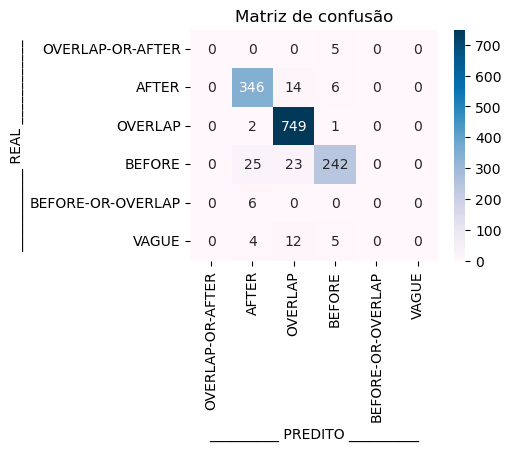

In [42]:
tb.tr.cm()

#### Teste

In [43]:
#Resumo do processamento
tb.tr.show_result = 'test'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE test
STATUS: PRIMEIRA_REGRA | 568 regras ativas | (test)
	Sem Pares Candidato | Fechamento
Acurácia Anotadas:       106.0 de   169.0 (62.7%)
Total Não Anotadas:                  285.0
Acurácia Não Anotadas:   106.0 de   454.0 (23.3%)

TAXA COBERTURA:          169.0 de   169.0 (100.0%)

Quant Regras Processadas:  208
Total Sentenças Anotadas Task A:   81
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  169
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.314     0.367     0.338        30
           BEFORE      0.438     0.350     0.389        20
BEFORE-OR-OVERLAP      0.000     0.000     0.000         1
          OVERLAP      0.746     0.830     0.786       106
 OVERLAP-OR-AFTER      0.000     0.000     0.000         1
            VAGUE      0.000     0.000     0.000        11

         accuracy                          0.627       169
        macro avg      0.250     0.258     0.252       169
     weighted avg      0.575     0.627     0.599       169



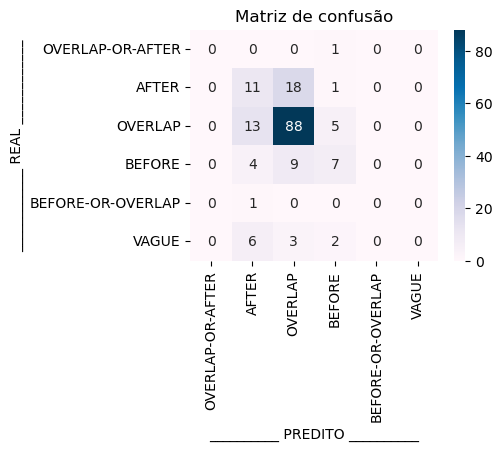

In [44]:
tb.tr.cm()

In [45]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,568,OVERLAP,3.0,6.0,9.0,26.0,17.14,66.67


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    OVERLAP          30       88      118          192       28.39   
     BEFORE            9        7       16           33       14.29   
     AFTER            24       11       35           60       11.58   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    OVERLAP                    74.58  
     BEFORE                     43.75  
     AFTER                      31.43

## Votação

In [46]:
tb.tr.processing_type = 'votacao'  # 'primeira_regra' OR 'votacao'

### Sem estratégias

In [47]:
tb.tr.active_tlink_candidate  = False
tb.tr.active_tlink_transitive = False
tb.tr.tlink_candidate.approach = 'ML'  # 'REGRAS_TREE', 'ML' or 'REGRAS'
tb.tr.tlink_candidate.threshold = 0.3

#processa todas as sentenças da task 'A'
tb.tr.process_rules()
tb.tr.status()

STATUS PROCESSAMENTO:
Task:                       A
Quant. Regras Ativas:       568
Ordenada por:               
Ordem reversa:              False
Tipo Processamento:         votacao
Tlink Candidato Ativo?      False
Tlink Transitivo Ativo?     False
Tlink Candidato Approach:   
Tlink Candidato Threshold:  
Regras processadas?         SIM


#### Treino

In [48]:
#Resumo do processamento
tb.tr.show_result = 'train'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE ['train', 'train_test']
STATUS: VOTACAO | 568 regras ativas | (['train', 'train_test'])
	Sem Pares Candidato | Sem Fechamento
Acurácia Anotadas:       1310.0 de  1440.0 (91.0%)
Total Não Anotadas:                 1640.0
Acurácia Não Anotadas:   1310.0 de  3080.0 (42.5%)

TAXA COBERTURA:          1440.0 de 1,440.0 (100.0%)

Quant Regras Processadas:  556
Total Sentenças Anotadas Task A:   645
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  1440
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.925     0.882     0.903       365
           BEFORE      0.812     0.910     0.859       290
BEFORE-OR-OVERLAP      0.000     0.000     0.000         6
          OVERLAP      0.944     0.963     0.953       752
 OVERLAP-OR-AFTER      0.000     0.000     0.000         6
            VAGUE      0.000     0.000     0.000        21

         accuracy                          0.910      1440
        macro avg      0.447     0.459     0.453      1440
     weighted avg      0.891     0.910     0.900      1440



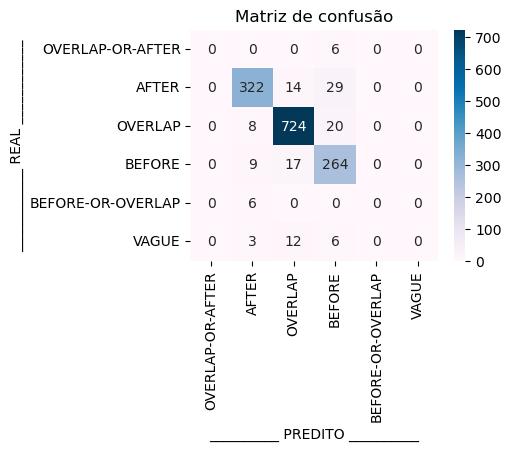

In [49]:
tb.tr.cm()

In [50]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,568,OVERLAP,11.0,21.0,32.0,120.0,13.82,65.62


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    OVERLAP          43      724      767         1107       38.63   
     AFTER            26      322      348          227       56.00   
     BEFORE           61      264      325          306       41.84   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    OVERLAP                    94.39  
     AFTER                      92.53  
     BEFORE                     81.23

#### Teste

In [51]:
#Resumo do processamento
tb.tr.show_result = 'test'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE test
STATUS: VOTACAO | 568 regras ativas | (test)
	Sem Pares Candidato | Sem Fechamento
Acurácia Anotadas:       106.0 de   169.0 (62.7%)
Total Não Anotadas:                  285.0
Acurácia Não Anotadas:   106.0 de   454.0 (23.3%)

TAXA COBERTURA:          169.0 de   169.0 (100.0%)

Quant Regras Processadas:  214
Total Sentenças Anotadas Task A:   81
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  169
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.353     0.400     0.375        30
           BEFORE      0.391     0.450     0.419        20
BEFORE-OR-OVERLAP      0.000     0.000     0.000         1
          OVERLAP      0.759     0.802     0.780       106
 OVERLAP-OR-AFTER      0.000     0.000     0.000         1
            VAGUE      0.000     0.000     0.000        11

         accuracy                          0.627       169
        macro avg      0.251     0.275     0.262       169
     weighted avg      0.585     0.627     0.605       169



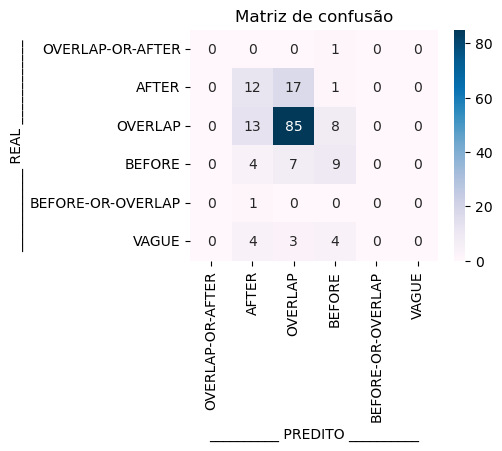

In [52]:
tb.tr.cm()

In [53]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,568,OVERLAP,3.0,6.0,9.0,26.0,17.14,66.67


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    OVERLAP          27       85      112          193       27.87   
     BEFORE           14        9       23           40       14.29   
     AFTER            22       12       34           52       13.95   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    OVERLAP                    75.89  
     BEFORE                     39.13  
     AFTER                      35.29

### +Fechamento Temporal

In [54]:
tb.tr.active_tlink_candidate  = False
tb.tr.active_tlink_transitive = True
tb.tr.tlink_candidate.approach = 'ML'  # 'REGRAS_TREE', 'ML' or 'REGRAS'
tb.tr.tlink_candidate.threshold = 0.3

#processa todas as sentenças da task 'A'
tb.tr.process_rules()
tb.tr.status()

STATUS PROCESSAMENTO:
Task:                       A
Quant. Regras Ativas:       568
Ordenada por:               
Ordem reversa:              False
Tipo Processamento:         votacao
Tlink Candidato Ativo?      False
Tlink Transitivo Ativo?     True
Tlink Candidato Approach:   
Tlink Candidato Threshold:  
Regras processadas?         SIM


#### Treino

In [55]:
#Resumo do processamento
tb.tr.show_result = 'train'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE ['train', 'train_test']
STATUS: VOTACAO | 568 regras ativas | (['train', 'train_test'])
	Sem Pares Candidato | Fechamento
Acurácia Anotadas:       1310.0 de  1440.0 (91.0%)
Total Não Anotadas:                 1640.0
Acurácia Não Anotadas:   1310.0 de  3080.0 (42.5%)

TAXA COBERTURA:          1440.0 de 1,440.0 (100.0%)

Quant Regras Processadas:  556
Total Sentenças Anotadas Task A:   645
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  1440
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.925     0.882     0.903       365
           BEFORE      0.812     0.910     0.859       290
BEFORE-OR-OVERLAP      0.000     0.000     0.000         6
          OVERLAP      0.944     0.963     0.953       752
 OVERLAP-OR-AFTER      0.000     0.000     0.000         6
            VAGUE      0.000     0.000     0.000        21

         accuracy                          0.910      1440
        macro avg      0.447     0.459     0.453      1440
     weighted avg      0.891     0.910     0.900      1440



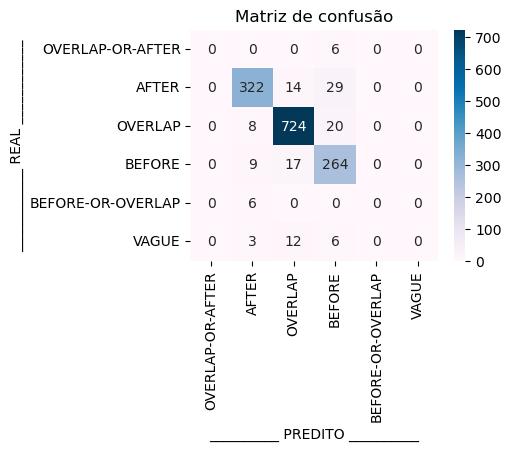

In [56]:
tb.tr.cm()

#### Teste

In [57]:
#Resumo do processamento
tb.tr.show_result = 'test'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE test
STATUS: VOTACAO | 568 regras ativas | (test)
	Sem Pares Candidato | Fechamento
Acurácia Anotadas:       106.0 de   169.0 (62.7%)
Total Não Anotadas:                  285.0
Acurácia Não Anotadas:   106.0 de   454.0 (23.3%)

TAXA COBERTURA:          169.0 de   169.0 (100.0%)

Quant Regras Processadas:  214
Total Sentenças Anotadas Task A:   81
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  169
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.353     0.400     0.375        30
           BEFORE      0.391     0.450     0.419        20
BEFORE-OR-OVERLAP      0.000     0.000     0.000         1
          OVERLAP      0.759     0.802     0.780       106
 OVERLAP-OR-AFTER      0.000     0.000     0.000         1
            VAGUE      0.000     0.000     0.000        11

         accuracy                          0.627       169
        macro avg      0.251     0.275     0.262       169
     weighted avg      0.585     0.627     0.605       169



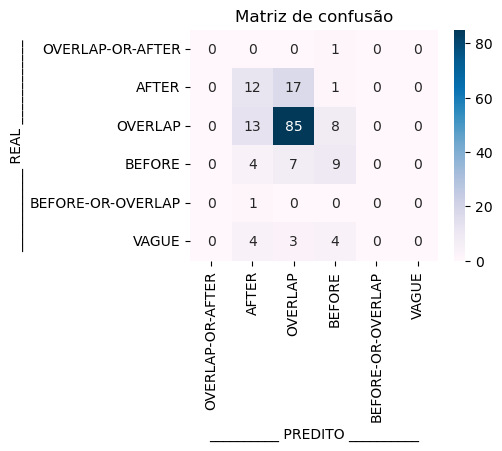

In [58]:
tb.tr.cm()

In [59]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,568,OVERLAP,3.0,6.0,9.0,26.0,17.14,66.67


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    OVERLAP          27       85      112          193       27.87   
     BEFORE           14        9       23           40       14.29   
     AFTER            22       12       34           52       13.95   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    OVERLAP                    75.89  
     BEFORE                     39.13  
     AFTER                      35.29

# IDS

In [60]:
tb.tr.load_rules('rules/FINAL_IDS.txt')

As regras do arquivo rules/FINAL_IDS.txt foram carregadas com sucesso. 
Total de regras: 383


## Primeira Regra Acionada 

In [61]:
tb.tr.processing_type = 'primeira_regra'  # 'primeira_regra' OR 'votacao'

### Sem estratégias

In [62]:
tb.tr.active_tlink_candidate  = False
tb.tr.active_tlink_transitive = False
tb.tr.tlink_candidate.approach = 'ML'  # 'REGRAS_TREE', 'ML' or 'REGRAS'
tb.tr.tlink_candidate.threshold = 0.3

#processa todas as sentenças da task 'A'
tb.tr.process_rules()
tb.tr.status()

STATUS PROCESSAMENTO:
Task:                       A
Quant. Regras Ativas:       383
Ordenada por:               
Ordem reversa:              False
Tipo Processamento:         primeira_regra
Tlink Candidato Ativo?      False
Tlink Transitivo Ativo?     False
Tlink Candidato Approach:   
Tlink Candidato Threshold:  
Regras processadas?         SIM


#### Treino

In [63]:
#Resumo do processamento
tb.tr.show_result = 'train'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE ['train', 'train_test']
STATUS: PRIMEIRA_REGRA | 383 regras ativas | (['train', 'train_test'])
	Sem Pares Candidato | Sem Fechamento
Acurácia Anotadas:       1113.0 de  1440.0 (77.3%)
Total Não Anotadas:                 1640.0
Acurácia Não Anotadas:   1113.0 de  3080.0 (36.1%)

TAXA COBERTURA:          1440.0 de 1,440.0 (100.0%)

Quant Regras Processadas:  311
Total Sentenças Anotadas Task A:   645
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  1440
Total Relações Anotadas sem predição:  0






              precision    recall  f1-score   support

       AFTER      0.981     0.584     0.732       356
      BEFORE      1.000     0.425     0.597       275
     OVERLAP      0.708     0.996     0.828       788
       VAGUE      1.000     0.143     0.250        21

    accuracy                          0.773      1440
   macro avg      0.922     0.537     0.602      1440
weighted avg      0.836     0.773     0.752      1440



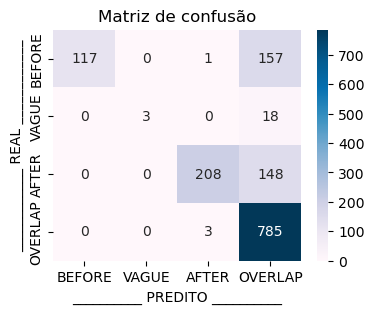

In [64]:
tb.tr.cm()

In [65]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,385,OVERLAP,311.0,181.0,492.0,375.0,20.88,36.79


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    VAGUE           0.0      3.0      3.0          0.0      100.00   
     BEFORE          0.0    117.0    117.0         79.0       59.69   
     AFTER           4.0    208.0    212.0        237.0       46.33   
     OVERLAP       323.0    785.0   1108.0       1324.0       32.28   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    VAGUE                     100.00  
     BEFORE                    100.00  
     AFTER                      98.11  
     OVERLAP                    70.85

#### Teste

In [66]:
#Resumo do processamento
tb.tr.show_result = 'test'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE test
STATUS: PRIMEIRA_REGRA | 383 regras ativas | (test)
	Sem Pares Candidato | Sem Fechamento
Acurácia Anotadas:       109.0 de   169.0 (64.5%)
Total Não Anotadas:                  285.0
Acurácia Não Anotadas:   109.0 de   454.0 (24.0%)

TAXA COBERTURA:          169.0 de   169.0 (100.0%)

Quant Regras Processadas:  151
Total Sentenças Anotadas Task A:   81
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  169
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.292     0.226     0.255        31
           BEFORE      0.700     0.350     0.467        20
BEFORE-OR-OVERLAP      0.000     0.000     0.000         1
          OVERLAP      0.704     0.896     0.788       106
            VAGUE      0.000     0.000     0.000        11

         accuracy                          0.645       169
        macro avg      0.339     0.294     0.302       169
     weighted avg      0.578     0.645     0.596       169



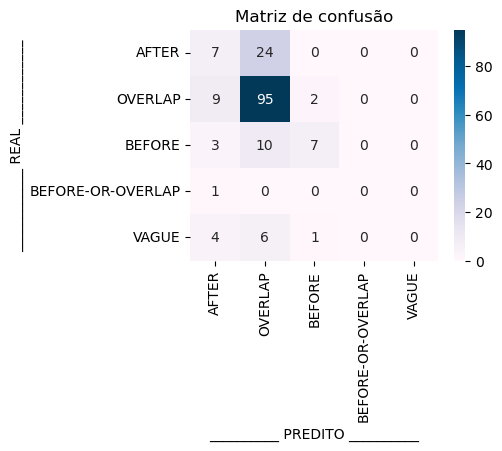

In [67]:
tb.tr.cm()

In [68]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,385,OVERLAP,23.0,14.0,37.0,45.0,17.07,37.84


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    OVERLAP          40       95      135          228       26.17   
     BEFORE            3        7       10            7       41.18   
     AFTER            17        7       24           50        9.46   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    OVERLAP                    70.37  
     BEFORE                     70.00  
     AFTER                      29.17

### +Fechamento Temporal

In [69]:
tb.tr.active_tlink_candidate  = False
tb.tr.active_tlink_transitive = True
tb.tr.tlink_candidate.approach = 'ML'  # 'REGRAS_TREE', 'ML' or 'REGRAS'
tb.tr.tlink_candidate.threshold = 0.3

#processa todas as sentenças da task 'A'
tb.tr.process_rules()
tb.tr.status()

STATUS PROCESSAMENTO:
Task:                       A
Quant. Regras Ativas:       383
Ordenada por:               
Ordem reversa:              False
Tipo Processamento:         primeira_regra
Tlink Candidato Ativo?      False
Tlink Transitivo Ativo?     True
Tlink Candidato Approach:   
Tlink Candidato Threshold:  
Regras processadas?         SIM


#### Treino

In [70]:
#Resumo do processamento
tb.tr.show_result = 'train'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE ['train', 'train_test']
STATUS: PRIMEIRA_REGRA | 383 regras ativas | (['train', 'train_test'])
	Sem Pares Candidato | Fechamento
Acurácia Anotadas:       1113.0 de  1440.0 (77.3%)
Total Não Anotadas:                 1640.0
Acurácia Não Anotadas:   1113.0 de  3080.0 (36.1%)

TAXA COBERTURA:          1440.0 de 1,440.0 (100.0%)

Quant Regras Processadas:  311
Total Sentenças Anotadas Task A:   645
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  1440
Total Relações Anotadas sem predição:  0






              precision    recall  f1-score   support

       AFTER      0.981     0.584     0.732       356
      BEFORE      1.000     0.425     0.597       275
     OVERLAP      0.708     0.996     0.828       788
       VAGUE      1.000     0.143     0.250        21

    accuracy                          0.773      1440
   macro avg      0.922     0.537     0.602      1440
weighted avg      0.836     0.773     0.752      1440



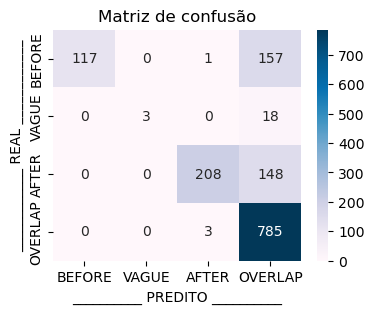

In [71]:
tb.tr.cm()

#### Teste

In [72]:
#Resumo do processamento
tb.tr.show_result = 'test'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE test
STATUS: PRIMEIRA_REGRA | 383 regras ativas | (test)
	Sem Pares Candidato | Fechamento
Acurácia Anotadas:       109.0 de   169.0 (64.5%)
Total Não Anotadas:                  285.0
Acurácia Não Anotadas:   109.0 de   454.0 (24.0%)

TAXA COBERTURA:          169.0 de   169.0 (100.0%)

Quant Regras Processadas:  151
Total Sentenças Anotadas Task A:   81
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  169
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.292     0.226     0.255        31
           BEFORE      0.700     0.350     0.467        20
BEFORE-OR-OVERLAP      0.000     0.000     0.000         1
          OVERLAP      0.704     0.896     0.788       106
            VAGUE      0.000     0.000     0.000        11

         accuracy                          0.645       169
        macro avg      0.339     0.294     0.302       169
     weighted avg      0.578     0.645     0.596       169



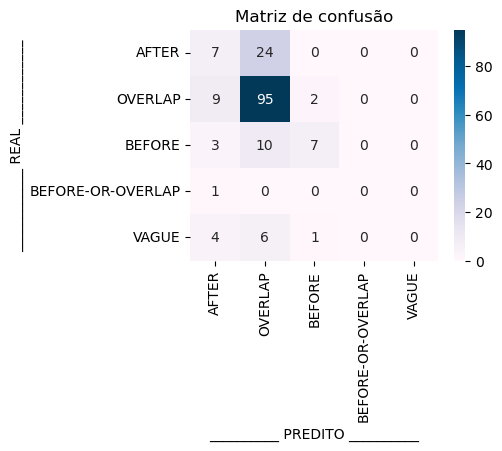

In [73]:
tb.tr.cm()

In [74]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,385,OVERLAP,23.0,14.0,37.0,45.0,17.07,37.84


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    OVERLAP          40       95      135          228       26.17   
     BEFORE            3        7       10            7       41.18   
     AFTER            17        7       24           50        9.46   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    OVERLAP                    70.37  
     BEFORE                     70.00  
     AFTER                      29.17

## Votação

In [75]:
tb.tr.processing_type = 'votacao'  # 'primeira_regra' OR 'votacao'

### Sem estratégias

In [76]:
tb.tr.active_tlink_candidate  = False
tb.tr.active_tlink_transitive = False
tb.tr.tlink_candidate.approach = 'ML'  # 'REGRAS_TREE', 'ML' or 'REGRAS'
tb.tr.tlink_candidate.threshold = 0.3

#processa todas as sentenças da task 'A'
tb.tr.process_rules()
tb.tr.status()

STATUS PROCESSAMENTO:
Task:                       A
Quant. Regras Ativas:       383
Ordenada por:               
Ordem reversa:              False
Tipo Processamento:         votacao
Tlink Candidato Ativo?      False
Tlink Transitivo Ativo?     False
Tlink Candidato Approach:   
Tlink Candidato Threshold:  
Regras processadas?         SIM


#### Treino

In [77]:
#Resumo do processamento
tb.tr.show_result = 'train'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE ['train', 'train_test']
STATUS: VOTACAO | 383 regras ativas | (['train', 'train_test'])
	Sem Pares Candidato | Sem Fechamento
Acurácia Anotadas:       1078.0 de  1440.0 (74.9%)
Total Não Anotadas:                 1640.0
Acurácia Não Anotadas:   1078.0 de  3080.0 (35.0%)

TAXA COBERTURA:          1440.0 de 1,440.0 (100.0%)

Quant Regras Processadas:  314
Total Sentenças Anotadas Task A:   645
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  1440
Total Relações Anotadas sem predição:  0






              precision    recall  f1-score   support

       AFTER      0.984     0.517     0.678       356
      BEFORE      1.000     0.385     0.556       275
     OVERLAP      0.686     0.996     0.813       788
       VAGUE      1.000     0.143     0.250        21

    accuracy                          0.749      1440
   macro avg      0.918     0.510     0.574      1440
weighted avg      0.824     0.749     0.722      1440



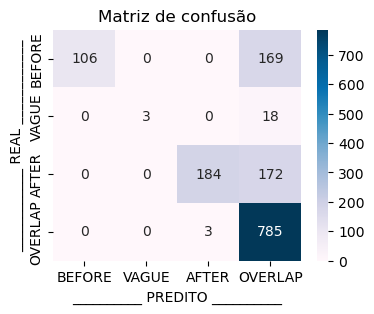

In [78]:
tb.tr.cm()

In [79]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,385,OVERLAP,311.0,181.0,492.0,375.0,20.88,36.79


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    VAGUE           0.0      3.0      3.0          0.0      100.00   
     BEFORE          0.0    106.0    106.0         59.0       64.24   
     AFTER           3.0    184.0    187.0        181.0       50.00   
     OVERLAP       359.0    785.0   1144.0       1400.0       30.86   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    VAGUE                     100.00  
     BEFORE                    100.00  
     AFTER                      98.40  
     OVERLAP                    68.62

#### Teste

In [80]:
#Resumo do processamento
tb.tr.show_result = 'test'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE test
STATUS: VOTACAO | 383 regras ativas | (test)
	Sem Pares Candidato | Sem Fechamento
Acurácia Anotadas:       113.0 de   169.0 (66.9%)
Total Não Anotadas:                  285.0
Acurácia Não Anotadas:   113.0 de   454.0 (24.9%)

TAXA COBERTURA:          169.0 de   169.0 (100.0%)

Quant Regras Processadas:  154
Total Sentenças Anotadas Task A:   81
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  169
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.353     0.194     0.250        31
           BEFORE      0.778     0.350     0.483        20
BEFORE-OR-OVERLAP      0.000     0.000     0.000         1
          OVERLAP      0.699     0.943     0.803       106
            VAGUE      0.000     0.000     0.000        11

         accuracy                          0.669       169
        macro avg      0.366     0.297     0.307       169
     weighted avg      0.595     0.669     0.607       169



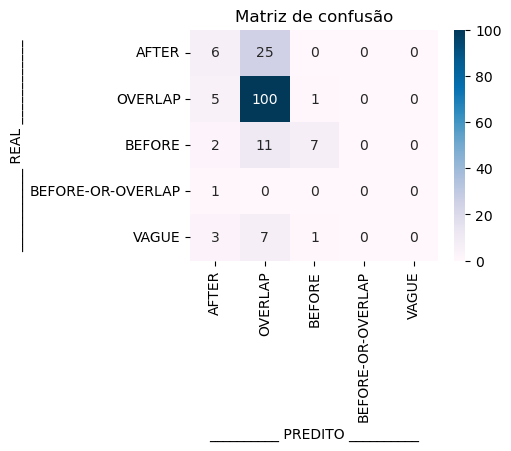

In [81]:
tb.tr.cm()

In [82]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,385,OVERLAP,23.0,14.0,37.0,45.0,17.07,37.84


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    BEFORE            2        7        9            5       50.00   
     OVERLAP          43      100      143          240       26.11   
     AFTER            11        6       17           40       10.53   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    BEFORE                     77.78  
     OVERLAP                    69.93  
     AFTER                      35.29

### +Fechamento Temporal

In [83]:
tb.tr.active_tlink_candidate  = False
tb.tr.active_tlink_transitive = True
tb.tr.tlink_candidate.approach = 'ML'  # 'REGRAS_TREE', 'ML' or 'REGRAS'
tb.tr.tlink_candidate.threshold = 0.3

#processa todas as sentenças da task 'A'
tb.tr.process_rules()
tb.tr.status()

STATUS PROCESSAMENTO:
Task:                       A
Quant. Regras Ativas:       383
Ordenada por:               
Ordem reversa:              False
Tipo Processamento:         votacao
Tlink Candidato Ativo?      False
Tlink Transitivo Ativo?     True
Tlink Candidato Approach:   
Tlink Candidato Threshold:  
Regras processadas?         SIM


#### Treino

In [84]:
#Resumo do processamento
tb.tr.show_result = 'train'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE ['train', 'train_test']
STATUS: VOTACAO | 383 regras ativas | (['train', 'train_test'])
	Sem Pares Candidato | Fechamento
Acurácia Anotadas:       1078.0 de  1440.0 (74.9%)
Total Não Anotadas:                 1640.0
Acurácia Não Anotadas:   1078.0 de  3080.0 (35.0%)

TAXA COBERTURA:          1440.0 de 1,440.0 (100.0%)

Quant Regras Processadas:  314
Total Sentenças Anotadas Task A:   645
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  1440
Total Relações Anotadas sem predição:  0






              precision    recall  f1-score   support

       AFTER      0.984     0.517     0.678       356
      BEFORE      1.000     0.385     0.556       275
     OVERLAP      0.686     0.996     0.813       788
       VAGUE      1.000     0.143     0.250        21

    accuracy                          0.749      1440
   macro avg      0.918     0.510     0.574      1440
weighted avg      0.824     0.749     0.722      1440



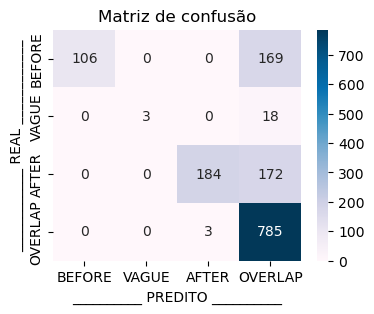

In [85]:
tb.tr.cm()

#### Teste

In [86]:
#Resumo do processamento
tb.tr.show_result = 'test'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE test
STATUS: VOTACAO | 383 regras ativas | (test)
	Sem Pares Candidato | Fechamento
Acurácia Anotadas:       113.0 de   169.0 (66.9%)
Total Não Anotadas:                  285.0
Acurácia Não Anotadas:   113.0 de   454.0 (24.9%)

TAXA COBERTURA:          169.0 de   169.0 (100.0%)

Quant Regras Processadas:  154
Total Sentenças Anotadas Task A:   81
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  169
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.353     0.194     0.250        31
           BEFORE      0.778     0.350     0.483        20
BEFORE-OR-OVERLAP      0.000     0.000     0.000         1
          OVERLAP      0.699     0.943     0.803       106
            VAGUE      0.000     0.000     0.000        11

         accuracy                          0.669       169
        macro avg      0.366     0.297     0.307       169
     weighted avg      0.595     0.669     0.607       169



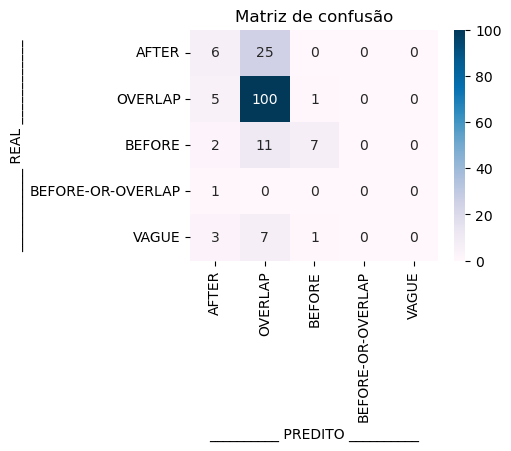

In [87]:
tb.tr.cm()

In [88]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,385,OVERLAP,23.0,14.0,37.0,45.0,17.07,37.84


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    BEFORE            2        7        9            5       50.00   
     OVERLAP          43      100      143          240       26.11   
     AFTER            11        6       17           40       10.53   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    BEFORE                     77.78  
     OVERLAP                    69.93  
     AFTER                      35.29

# RIPPER

In [89]:
tb.tr.load_rules('rules/FINAL_RIPPER.txt')

As regras do arquivo rules/FINAL_RIPPER.txt foram carregadas com sucesso. 
Total de regras: 146


## Primeira Regra Acionada 

In [90]:
tb.tr.processing_type = 'primeira_regra'  # 'primeira_regra' OR 'votacao'

### Sem estratégias

In [91]:
tb.tr.active_tlink_candidate  = False
tb.tr.active_tlink_transitive = False
tb.tr.tlink_candidate.approach = 'ML'  # 'REGRAS_TREE', 'ML' or 'REGRAS'
tb.tr.tlink_candidate.threshold = 0.3

#processa todas as sentenças da task 'A'
tb.tr.process_rules()
tb.tr.status()

STATUS PROCESSAMENTO:
Task:                       A
Quant. Regras Ativas:       146
Ordenada por:               
Ordem reversa:              False
Tipo Processamento:         primeira_regra
Tlink Candidato Ativo?      False
Tlink Transitivo Ativo?     False
Tlink Candidato Approach:   
Tlink Candidato Threshold:  
Regras processadas?         SIM


#### Treino

In [92]:
#Resumo do processamento
tb.tr.show_result = 'train'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE ['train', 'train_test']
STATUS: PRIMEIRA_REGRA | 146 regras ativas | (['train', 'train_test'])
	Sem Pares Candidato | Sem Fechamento
Acurácia Anotadas:       1124.0 de  1440.0 (78.1%)
Total Não Anotadas:                 1640.0
Acurácia Não Anotadas:   1124.0 de  3080.0 (36.5%)

TAXA COBERTURA:          1440.0 de 1,440.0 (100.0%)

Quant Regras Processadas:  119
Total Sentenças Anotadas Task A:   645
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  1440
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.805     0.670     0.732       364
           BEFORE      0.760     0.648     0.700       284
BEFORE-OR-OVERLAP      0.000     0.000     0.000         3
          OVERLAP      0.777     0.903     0.835       762
 OVERLAP-OR-AFTER      0.857     1.000     0.923         6
            VAGUE      0.667     0.095     0.167        21

         accuracy                          0.781      1440
        macro avg      0.644     0.553     0.559      1440
     weighted avg      0.778     0.781     0.771      1440



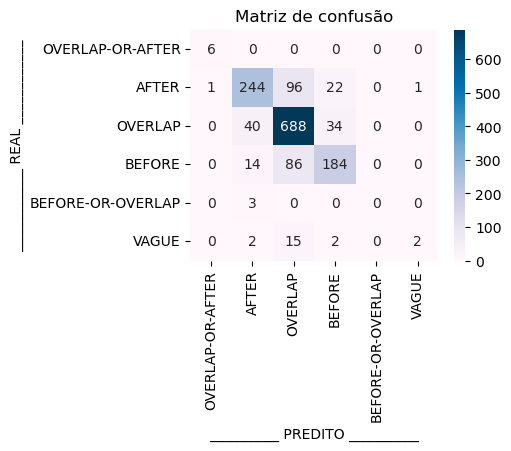

In [93]:
tb.tr.cm()

In [94]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,211,OVERLAP,77.0,34.0,111.0,212.0,10.53,30.63


Resultado               Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                          
A    OVERLAP-OR-AFTER     1.0      6.0      7.0            7       42.86   
     AFTER               59.0    244.0    303.0          291       41.08   
     OVERLAP            197.0    688.0    885.0         1095       34.75   
     BEFORE              58.0    184.0    242.0          241       38.10   
     VAGUE                1.0      2.0      3.0            2       40.00   
     BEFORE-OR-OVERLAP    0.0      0.0      0.0            4        0.00   

Resultado               pct_acerto_anotado  
task relType_pred                           
A    OVERLAP-OR-AFTER                85.71  
     AFTER                           80.53  
     OVERLAP                         77.74  
     BEFORE                          76.03  
     VAGUE                           66.67  
     BEFORE-OR-OVERLAP                0.00

#### Teste

In [95]:
#Resumo do processamento
tb.tr.show_result = 'test'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE test
STATUS: PRIMEIRA_REGRA | 146 regras ativas | (test)
	Sem Pares Candidato | Sem Fechamento
Acurácia Anotadas:       110.0 de   169.0 (65.1%)
Total Não Anotadas:                  285.0
Acurácia Não Anotadas:   110.0 de   454.0 (24.2%)

TAXA COBERTURA:          169.0 de   169.0 (100.0%)

Quant Regras Processadas:  79
Total Sentenças Anotadas Task A:   81
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  169
Total Relações Anotadas sem predição:  0






                  precision    recall  f1-score   support

           AFTER      0.425     0.548     0.479        31
          BEFORE      0.346     0.429     0.383        21
         OVERLAP      0.824     0.792     0.808       106
OVERLAP-OR-AFTER      0.000     0.000     0.000         0
           VAGUE      0.000     0.000     0.000        11

        accuracy                          0.651       169
       macro avg      0.319     0.354     0.334       169
    weighted avg      0.638     0.651     0.642       169



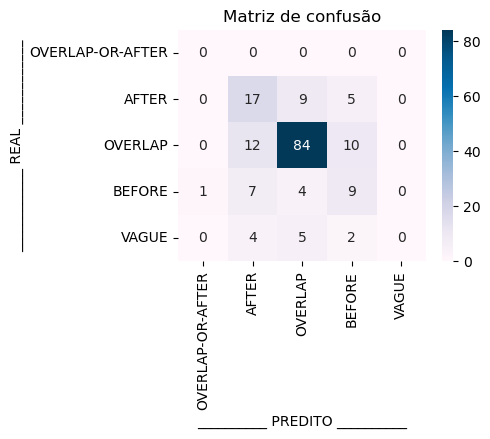

In [96]:
tb.tr.cm()

In [97]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,211,OVERLAP,3.0,8.0,11.0,53.0,12.5,72.73


Resultado              Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                         
A    OVERLAP            18.0     84.0    102.0        201.0       27.72   
     AFTER              23.0     17.0     40.0         37.0       22.08   
     BEFORE             17.0      9.0     26.0         47.0       12.33   
     OVERLAP-OR-AFTER    1.0      0.0      1.0          0.0        0.00   

Resultado              pct_acerto_anotado  
task relType_pred                          
A    OVERLAP                        82.35  
     AFTER                          42.50  
     BEFORE                         34.62  
     OVERLAP-OR-AFTER                0.00

### +Fechamento Temporal

In [98]:
tb.tr.active_tlink_candidate  = False
tb.tr.active_tlink_transitive = True
tb.tr.tlink_candidate.approach = 'ML'  # 'REGRAS_TREE', 'ML' or 'REGRAS'
tb.tr.tlink_candidate.threshold = 0.3

#processa todas as sentenças da task 'A'
tb.tr.process_rules()
tb.tr.status()

STATUS PROCESSAMENTO:
Task:                       A
Quant. Regras Ativas:       146
Ordenada por:               
Ordem reversa:              False
Tipo Processamento:         primeira_regra
Tlink Candidato Ativo?      False
Tlink Transitivo Ativo?     True
Tlink Candidato Approach:   
Tlink Candidato Threshold:  
Regras processadas?         SIM


#### Treino

In [99]:
#Resumo do processamento
tb.tr.show_result = 'train'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE ['train', 'train_test']
STATUS: PRIMEIRA_REGRA | 146 regras ativas | (['train', 'train_test'])
	Sem Pares Candidato | Fechamento
Acurácia Anotadas:       1124.0 de  1440.0 (78.1%)
Total Não Anotadas:                 1640.0
Acurácia Não Anotadas:   1124.0 de  3080.0 (36.5%)

TAXA COBERTURA:          1440.0 de 1,440.0 (100.0%)

Quant Regras Processadas:  119
Total Sentenças Anotadas Task A:   645
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  1440
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.805     0.670     0.732       364
           BEFORE      0.760     0.648     0.700       284
BEFORE-OR-OVERLAP      0.000     0.000     0.000         3
          OVERLAP      0.777     0.903     0.835       762
 OVERLAP-OR-AFTER      0.857     1.000     0.923         6
            VAGUE      0.667     0.095     0.167        21

         accuracy                          0.781      1440
        macro avg      0.644     0.553     0.559      1440
     weighted avg      0.778     0.781     0.771      1440



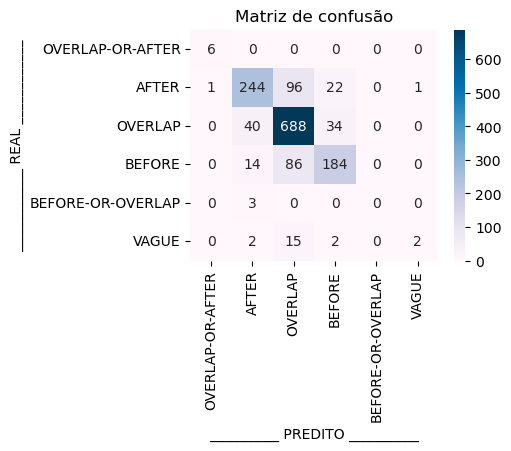

In [100]:
tb.tr.cm()

#### Teste

In [101]:
#Resumo do processamento
tb.tr.show_result = 'test'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE test
STATUS: PRIMEIRA_REGRA | 146 regras ativas | (test)
	Sem Pares Candidato | Fechamento
Acurácia Anotadas:       110.0 de   169.0 (65.1%)
Total Não Anotadas:                  285.0
Acurácia Não Anotadas:   110.0 de   454.0 (24.2%)

TAXA COBERTURA:          169.0 de   169.0 (100.0%)

Quant Regras Processadas:  79
Total Sentenças Anotadas Task A:   81
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  169
Total Relações Anotadas sem predição:  0






                  precision    recall  f1-score   support

           AFTER      0.425     0.548     0.479        31
          BEFORE      0.346     0.429     0.383        21
         OVERLAP      0.824     0.792     0.808       106
OVERLAP-OR-AFTER      0.000     0.000     0.000         0
           VAGUE      0.000     0.000     0.000        11

        accuracy                          0.651       169
       macro avg      0.319     0.354     0.334       169
    weighted avg      0.638     0.651     0.642       169



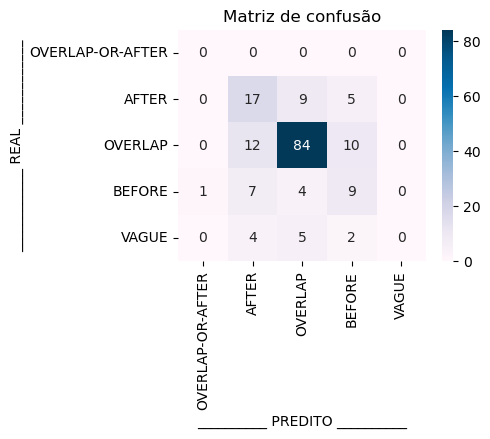

In [102]:
tb.tr.cm()

In [103]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,211,OVERLAP,3.0,8.0,11.0,53.0,12.5,72.73


Resultado              Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                         
A    OVERLAP            18.0     84.0    102.0        201.0       27.72   
     AFTER              23.0     17.0     40.0         37.0       22.08   
     BEFORE             17.0      9.0     26.0         47.0       12.33   
     OVERLAP-OR-AFTER    1.0      0.0      1.0          0.0        0.00   

Resultado              pct_acerto_anotado  
task relType_pred                          
A    OVERLAP                        82.35  
     AFTER                          42.50  
     BEFORE                         34.62  
     OVERLAP-OR-AFTER                0.00

## Votação

In [104]:
tb.tr.processing_type = 'votacao'  # 'primeira_regra' OR 'votacao'

### Sem estratégias

In [105]:
tb.tr.active_tlink_candidate  = False
tb.tr.active_tlink_transitive = False
tb.tr.tlink_candidate.approach = 'ML'  # 'REGRAS_TREE', 'ML' or 'REGRAS'
tb.tr.tlink_candidate.threshold = 0.3

#processa todas as sentenças da task 'A'
tb.tr.process_rules()
tb.tr.status()

STATUS PROCESSAMENTO:
Task:                       A
Quant. Regras Ativas:       146
Ordenada por:               
Ordem reversa:              False
Tipo Processamento:         votacao
Tlink Candidato Ativo?      False
Tlink Transitivo Ativo?     False
Tlink Candidato Approach:   
Tlink Candidato Threshold:  
Regras processadas?         SIM


#### Treino

In [106]:
#Resumo do processamento
tb.tr.show_result = 'train'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE ['train', 'train_test']
STATUS: VOTACAO | 146 regras ativas | (['train', 'train_test'])
	Sem Pares Candidato | Sem Fechamento
Acurácia Anotadas:       1068.0 de  1440.0 (74.2%)
Total Não Anotadas:                 1640.0
Acurácia Não Anotadas:   1068.0 de  3080.0 (34.7%)

TAXA COBERTURA:          1440.0 de 1,440.0 (100.0%)

Quant Regras Processadas:  116
Total Sentenças Anotadas Task A:   645
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  1440
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.789     0.548     0.647       361
           BEFORE      0.808     0.527     0.638       279
BEFORE-OR-OVERLAP      1.000     0.400     0.571         5
          OVERLAP      0.716     0.928     0.809       767
 OVERLAP-OR-AFTER      0.875     1.000     0.933         7
            VAGUE      0.667     0.095     0.167        21

         accuracy                          0.742      1440
        macro avg      0.809     0.583     0.627      1440
     weighted avg      0.753     0.742     0.725      1440



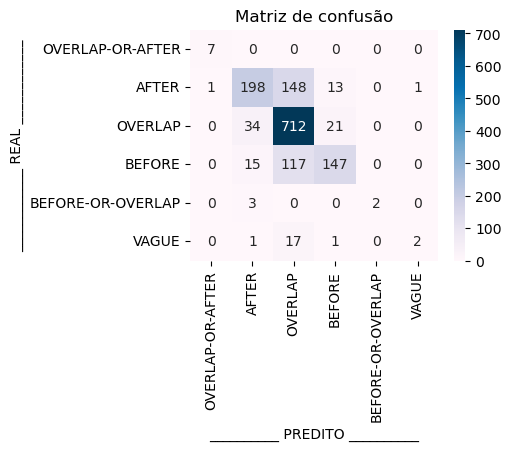

In [107]:
tb.tr.cm()

In [108]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,211,OVERLAP,77.0,34.0,111.0,212.0,10.53,30.63


Resultado               Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                          
A    BEFORE-OR-OVERLAP      0        2        2            4       33.33   
     OVERLAP-OR-AFTER       1        7        8            8       43.75   
     BEFORE                35      147      182          151       44.14   
     AFTER                 53      198      251          210       42.95   
     OVERLAP              282      712      994         1265       31.52   
     VAGUE                  1        2        3            2       40.00   

Resultado               pct_acerto_anotado  
task relType_pred                           
A    BEFORE-OR-OVERLAP              100.00  
     OVERLAP-OR-AFTER                87.50  
     BEFORE                          80.77  
     AFTER                           78.88  
     OVERLAP                         71.63  
     VAGUE                           66.67

#### Teste

In [109]:
#Resumo do processamento
tb.tr.show_result = 'test'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE test
STATUS: VOTACAO | 146 regras ativas | (test)
	Sem Pares Candidato | Sem Fechamento
Acurácia Anotadas:       117.0 de   169.0 (69.2%)
Total Não Anotadas:                  285.0
Acurácia Não Anotadas:   117.0 de   454.0 (25.8%)

TAXA COBERTURA:          169.0 de   169.0 (100.0%)

Quant Regras Processadas:  79
Total Sentenças Anotadas Task A:   81
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  169
Total Relações Anotadas sem predição:  0






                  precision    recall  f1-score   support

           AFTER      0.536     0.484     0.508        31
          BEFORE      0.444     0.381     0.410        21
         OVERLAP      0.770     0.887     0.825       106
OVERLAP-OR-AFTER      0.000     0.000     0.000         0
           VAGUE      0.000     0.000     0.000        11

        accuracy                          0.692       169
       macro avg      0.350     0.350     0.349       169
    weighted avg      0.637     0.692     0.661       169



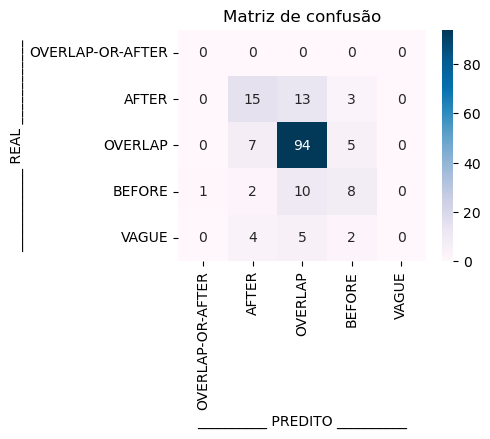

In [110]:
tb.tr.cm()

In [111]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,211,OVERLAP,3.0,8.0,11.0,53.0,12.5,72.73


Resultado              Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                         
A    OVERLAP            28.0     94.0    122.0        238.0       26.11   
     AFTER              13.0     15.0     28.0         21.0       30.61   
     BEFORE             10.0      8.0     18.0         26.0       18.18   
     OVERLAP-OR-AFTER    1.0      0.0      1.0          0.0        0.00   

Resultado              pct_acerto_anotado  
task relType_pred                          
A    OVERLAP                        77.05  
     AFTER                          53.57  
     BEFORE                         44.44  
     OVERLAP-OR-AFTER                0.00

### +Fechamento Temporal

In [112]:
tb.tr.active_tlink_candidate  = False
tb.tr.active_tlink_transitive = True
tb.tr.tlink_candidate.approach = 'ML'  # 'REGRAS_TREE', 'ML' or 'REGRAS'
tb.tr.tlink_candidate.threshold = 0.3

#processa todas as sentenças da task 'A'
tb.tr.process_rules()
tb.tr.status()

STATUS PROCESSAMENTO:
Task:                       A
Quant. Regras Ativas:       146
Ordenada por:               
Ordem reversa:              False
Tipo Processamento:         votacao
Tlink Candidato Ativo?      False
Tlink Transitivo Ativo?     True
Tlink Candidato Approach:   
Tlink Candidato Threshold:  
Regras processadas?         SIM


#### Treino

In [113]:
#Resumo do processamento
tb.tr.show_result = 'train'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE ['train', 'train_test']
STATUS: VOTACAO | 146 regras ativas | (['train', 'train_test'])
	Sem Pares Candidato | Fechamento
Acurácia Anotadas:       1068.0 de  1440.0 (74.2%)
Total Não Anotadas:                 1640.0
Acurácia Não Anotadas:   1068.0 de  3080.0 (34.7%)

TAXA COBERTURA:          1440.0 de 1,440.0 (100.0%)

Quant Regras Processadas:  116
Total Sentenças Anotadas Task A:   645
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  1440
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.789     0.548     0.647       361
           BEFORE      0.808     0.527     0.638       279
BEFORE-OR-OVERLAP      1.000     0.400     0.571         5
          OVERLAP      0.716     0.928     0.809       767
 OVERLAP-OR-AFTER      0.875     1.000     0.933         7
            VAGUE      0.667     0.095     0.167        21

         accuracy                          0.742      1440
        macro avg      0.809     0.583     0.627      1440
     weighted avg      0.753     0.742     0.725      1440



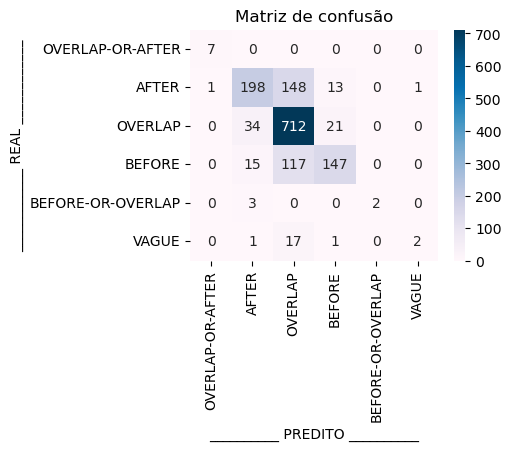

In [114]:
tb.tr.cm()

#### Teste

In [115]:
#Resumo do processamento
tb.tr.show_result = 'test'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE test
STATUS: VOTACAO | 146 regras ativas | (test)
	Sem Pares Candidato | Fechamento
Acurácia Anotadas:       117.0 de   169.0 (69.2%)
Total Não Anotadas:                  285.0
Acurácia Não Anotadas:   117.0 de   454.0 (25.8%)

TAXA COBERTURA:          169.0 de   169.0 (100.0%)

Quant Regras Processadas:  79
Total Sentenças Anotadas Task A:   81
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  169
Total Relações Anotadas sem predição:  0






                  precision    recall  f1-score   support

           AFTER      0.536     0.484     0.508        31
          BEFORE      0.444     0.381     0.410        21
         OVERLAP      0.770     0.887     0.825       106
OVERLAP-OR-AFTER      0.000     0.000     0.000         0
           VAGUE      0.000     0.000     0.000        11

        accuracy                          0.692       169
       macro avg      0.350     0.350     0.349       169
    weighted avg      0.637     0.692     0.661       169



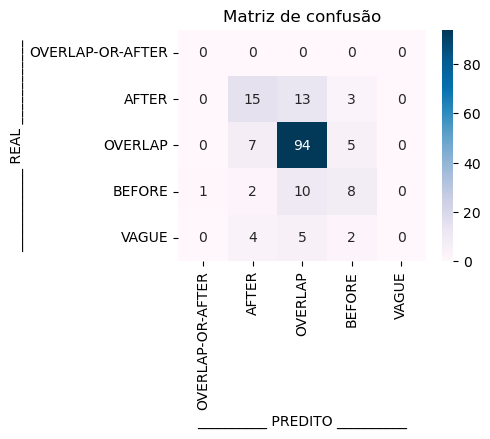

In [116]:
tb.tr.cm()

In [117]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,211,OVERLAP,3.0,8.0,11.0,53.0,12.5,72.73


Resultado              Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                         
A    OVERLAP            28.0     94.0    122.0        238.0       26.11   
     AFTER              13.0     15.0     28.0         21.0       30.61   
     BEFORE             10.0      8.0     18.0         26.0       18.18   
     OVERLAP-OR-AFTER    1.0      0.0      1.0          0.0        0.00   

Resultado              pct_acerto_anotado  
task relType_pred                          
A    OVERLAP                        77.05  
     AFTER                          53.57  
     BEFORE                         44.44  
     OVERLAP-OR-AFTER                0.00

# REGRAS MANUAIS - SEM CLASSE DEFAULT

In [118]:
tb.tr.load_rules('rules/Final_Manuais.txt')

As regras do arquivo rules/Final_Manuais.txt foram carregadas com sucesso. 
Total de regras: 35


## Primeira Regra Acionada 

In [119]:
tb.tr.processing_type = 'primeira_regra'  # 'primeira_regra' OR 'votacao'

### Sem estratégias

In [120]:
tb.tr.active_tlink_candidate  = False
tb.tr.active_tlink_transitive = False
tb.tr.tlink_candidate.approach = 'ML'  # 'REGRAS_TREE', 'ML' or 'REGRAS'
tb.tr.tlink_candidate.threshold = 0.3

#processa todas as sentenças da task 'A'
tb.tr.process_rules()
tb.tr.status()

STATUS PROCESSAMENTO:
Task:                       A
Quant. Regras Ativas:       35
Ordenada por:               
Ordem reversa:              False
Tipo Processamento:         primeira_regra
Tlink Candidato Ativo?      False
Tlink Transitivo Ativo?     False
Tlink Candidato Approach:   
Tlink Candidato Threshold:  
Regras processadas?         SIM


#### Treino

In [121]:
#Resumo do processamento
tb.tr.show_result = 'train'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE ['train', 'train_test']
STATUS: PRIMEIRA_REGRA | 35 regras ativas | (['train', 'train_test'])
	Sem Pares Candidato | Sem Fechamento
Acurácia Anotadas:       355.0 de   474.0 (74.9%)
Total Não Anotadas:                  540.0
Acurácia Não Anotadas:   355.0 de  1014.0 (35.0%)

TAXA COBERTURA:          474.0 de 1,440.0 (32.9%)

Quant Regras Processadas:  33
Total Sentenças Anotadas Task A:   645
Total Sentenças Anotadas sem predição:  503
Total Relações Anotadas Task A:  1440
Total Relações Anotadas sem predição:  966






              precision    recall  f1-score   support

       AFTER      0.727     0.208     0.323        77
      BEFORE      0.762     0.457     0.571        70
     OVERLAP      0.749     0.956     0.840       321
       VAGUE      0.000     0.000     0.000         6

    accuracy                          0.749       474
   macro avg      0.559     0.405     0.434       474
weighted avg      0.738     0.749     0.706       474



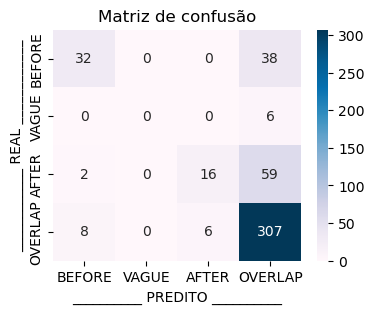

In [122]:
tb.tr.cm()

In [123]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,278.0,OVERLAP,0.0,4.0,4.0,5.0,44.44,100.0


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    BEFORE           10       32       42           35       41.56   
     OVERLAP         103      307      410          497       33.85   
     AFTER             6       16       22            8       53.33   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    BEFORE                     76.19  
     OVERLAP                    74.88  
     AFTER                      72.73

#### Teste

In [124]:
#Resumo do processamento
tb.tr.show_result = 'test'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE test
STATUS: PRIMEIRA_REGRA | 35 regras ativas | (test)
	Sem Pares Candidato | Sem Fechamento
Acurácia Anotadas:        48.0 de    60.0 (80.0%)
Total Não Anotadas:                  102.0
Acurácia Não Anotadas:    48.0 de   162.0 (29.6%)

TAXA COBERTURA:           60.0 de   169.0 (35.5%)

Quant Regras Processadas:  23
Total Sentenças Anotadas Task A:   81
Total Sentenças Anotadas sem predição:  63
Total Relações Anotadas Task A:  169
Total Relações Anotadas sem predição:  109






              precision    recall  f1-score   support

       AFTER      1.000     0.571     0.727         7
      BEFORE      0.571     0.444     0.500         9
     OVERLAP      0.816     0.930     0.870        43
       VAGUE      0.000     0.000     0.000         1

    accuracy                          0.800        60
   macro avg      0.597     0.487     0.524        60
weighted avg      0.787     0.800     0.783        60



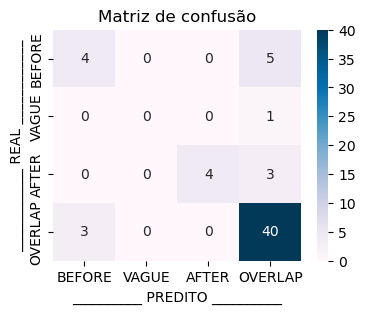

In [125]:
tb.tr.cm()

In [126]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,278.0,OVERLAP,0.0,0.0,0.0,2.0,0.0,0.0


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    AFTER             0        4        4            1       80.00   
     OVERLAP           9       40       49           87       29.41   
     BEFORE            3        4        7           14       19.05   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    AFTER                     100.00  
     OVERLAP                    81.63  
     BEFORE                     57.14

### +Fechamento Temporal

In [127]:
tb.tr.active_tlink_candidate  = False
tb.tr.active_tlink_transitive = True
tb.tr.tlink_candidate.approach = 'ML'  # 'REGRAS_TREE', 'ML' or 'REGRAS'
tb.tr.tlink_candidate.threshold = 0.3

#processa todas as sentenças da task 'A'
tb.tr.process_rules()
tb.tr.status()

STATUS PROCESSAMENTO:
Task:                       A
Quant. Regras Ativas:       35
Ordenada por:               
Ordem reversa:              False
Tipo Processamento:         primeira_regra
Tlink Candidato Ativo?      False
Tlink Transitivo Ativo?     True
Tlink Candidato Approach:   
Tlink Candidato Threshold:  
Regras processadas?         SIM


#### Treino

In [128]:
#Resumo do processamento
tb.tr.show_result = 'train'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE ['train', 'train_test']
STATUS: PRIMEIRA_REGRA | 35 regras ativas | (['train', 'train_test'])
	Sem Pares Candidato | Fechamento
Acurácia Anotadas:       366.0 de   507.0 (72.2%)
Total Não Anotadas:                  598.0
Acurácia Não Anotadas:   366.0 de  1105.0 (33.1%)

TAXA COBERTURA:          507.0 de 1,440.0 (35.2%)

Quant Regras Processadas:  36
Total Sentenças Anotadas Task A:   645
Total Sentenças Anotadas sem predição:  489
Total Relações Anotadas Task A:  1440
Total Relações Anotadas sem predição:  933






              precision    recall  f1-score   support

       AFTER      0.727     0.172     0.278        93
      BEFORE      0.733     0.434     0.545        76
     OVERLAP      0.720     0.958     0.822       331
       VAGUE      0.000     0.000     0.000         7

    accuracy                          0.722       507
   macro avg      0.545     0.391     0.412       507
weighted avg      0.714     0.722     0.670       507



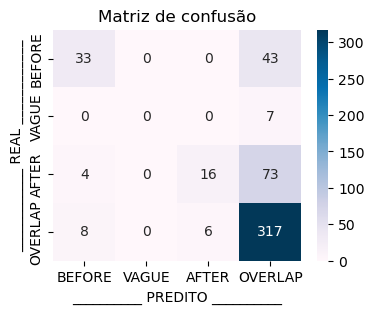

In [129]:
tb.tr.cm()

#### Teste

In [130]:
#Resumo do processamento
tb.tr.show_result = 'test'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE test
STATUS: PRIMEIRA_REGRA | 35 regras ativas | (test)
	Sem Pares Candidato | Fechamento
Acurácia Anotadas:        54.0 de    70.0 (77.1%)
Total Não Anotadas:                  119.0
Acurácia Não Anotadas:    54.0 de   189.0 (28.6%)

TAXA COBERTURA:           70.0 de   169.0 (41.4%)

Quant Regras Processadas:  26
Total Sentenças Anotadas Task A:   81
Total Sentenças Anotadas sem predição:  59
Total Relações Anotadas Task A:  169
Total Relações Anotadas sem predição:  99






              precision    recall  f1-score   support

       AFTER      0.833     0.500     0.625        10
      BEFORE      0.556     0.500     0.526        10
     OVERLAP      0.800     0.917     0.854        48
       VAGUE      0.000     0.000     0.000         2

    accuracy                          0.771        70
   macro avg      0.547     0.479     0.501        70
weighted avg      0.747     0.771     0.750        70



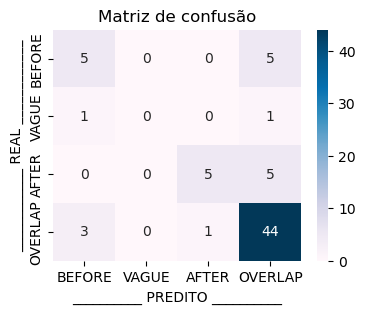

In [131]:
tb.tr.cm()

In [132]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,1000.0,OVERLAP,2.0,4.0,6.0,16.0,18.18,66.67


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    AFTER             1        5        6            2       62.50   
     OVERLAP          11       44       55          103       27.85   
     BEFORE            4        5        9           14       21.74   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    AFTER                      83.33  
     OVERLAP                    80.00  
     BEFORE                     55.56

## Votação

In [133]:
tb.tr.processing_type = 'votacao'  # 'primeira_regra' OR 'votacao'

### Sem estratégias

In [134]:
tb.tr.active_tlink_candidate  = False
tb.tr.active_tlink_transitive = False
tb.tr.tlink_candidate.approach = 'ML'  # 'REGRAS_TREE', 'ML' or 'REGRAS'
tb.tr.tlink_candidate.threshold = 0.3

#processa todas as sentenças da task 'A'
tb.tr.process_rules()
tb.tr.status()

STATUS PROCESSAMENTO:
Task:                       A
Quant. Regras Ativas:       35
Ordenada por:               
Ordem reversa:              False
Tipo Processamento:         votacao
Tlink Candidato Ativo?      False
Tlink Transitivo Ativo?     False
Tlink Candidato Approach:   
Tlink Candidato Threshold:  
Regras processadas?         SIM


#### Treino

In [135]:
#Resumo do processamento
tb.tr.show_result = 'train'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE ['train', 'train_test']
STATUS: VOTACAO | 35 regras ativas | (['train', 'train_test'])
	Sem Pares Candidato | Sem Fechamento
Acurácia Anotadas:       356.0 de   474.0 (75.1%)
Total Não Anotadas:                  540.0
Acurácia Não Anotadas:   356.0 de  1014.0 (35.1%)

TAXA COBERTURA:          474.0 de 1,440.0 (32.9%)

Quant Regras Processadas:  33
Total Sentenças Anotadas Task A:   645
Total Sentenças Anotadas sem predição:  503
Total Relações Anotadas Task A:  1440
Total Relações Anotadas sem predição:  966






              precision    recall  f1-score   support

       AFTER      0.762     0.208     0.327        77
      BEFORE      0.762     0.457     0.571        70
     OVERLAP      0.749     0.960     0.842       321
       VAGUE      0.000     0.000     0.000         6

    accuracy                          0.751       474
   macro avg      0.568     0.406     0.435       474
weighted avg      0.744     0.751     0.707       474



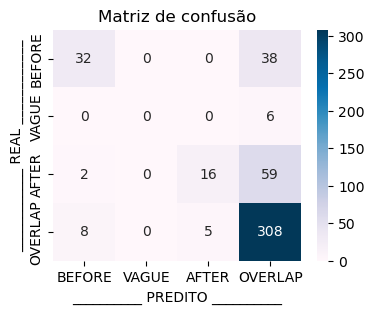

In [136]:
tb.tr.cm()

In [137]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,278.0,OVERLAP,0.0,4.0,4.0,5.0,44.44,100.0


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    BEFORE           10       32       42           35       41.56   
     AFTER             5       16       21            7       57.14   
     OVERLAP         103      308      411          498       33.88   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    BEFORE                     76.19  
     AFTER                      76.19  
     OVERLAP                    74.94

#### Teste

In [138]:
#Resumo do processamento
tb.tr.show_result = 'test'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE test
STATUS: VOTACAO | 35 regras ativas | (test)
	Sem Pares Candidato | Sem Fechamento
Acurácia Anotadas:        48.0 de    60.0 (80.0%)
Total Não Anotadas:                  102.0
Acurácia Não Anotadas:    48.0 de   162.0 (29.6%)

TAXA COBERTURA:           60.0 de   169.0 (35.5%)

Quant Regras Processadas:  23
Total Sentenças Anotadas Task A:   81
Total Sentenças Anotadas sem predição:  63
Total Relações Anotadas Task A:  169
Total Relações Anotadas sem predição:  109






              precision    recall  f1-score   support

       AFTER      1.000     0.571     0.727         7
      BEFORE      0.571     0.444     0.500         9
     OVERLAP      0.816     0.930     0.870        43
       VAGUE      0.000     0.000     0.000         1

    accuracy                          0.800        60
   macro avg      0.597     0.487     0.524        60
weighted avg      0.787     0.800     0.783        60



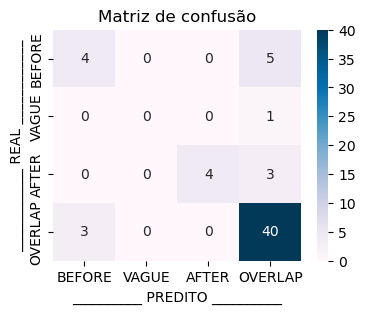

In [139]:
tb.tr.cm()

In [140]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,278.0,OVERLAP,0.0,0.0,0.0,2.0,0.0,0.0


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    AFTER           0.0      4.0      4.0          0.0      100.00   
     OVERLAP         9.0     40.0     49.0         88.0       29.20   
     BEFORE          3.0      4.0      7.0         14.0       19.05   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    AFTER                     100.00  
     OVERLAP                    81.63  
     BEFORE                     57.14

### +Fechamento Temporal

In [141]:
tb.tr.active_tlink_candidate  = False
tb.tr.active_tlink_transitive = True
tb.tr.tlink_candidate.approach = 'ML'  # 'REGRAS_TREE', 'ML' or 'REGRAS'
tb.tr.tlink_candidate.threshold = 0.3

#processa todas as sentenças da task 'A'
tb.tr.process_rules()
tb.tr.status()

STATUS PROCESSAMENTO:
Task:                       A
Quant. Regras Ativas:       35
Ordenada por:               
Ordem reversa:              False
Tipo Processamento:         votacao
Tlink Candidato Ativo?      False
Tlink Transitivo Ativo?     True
Tlink Candidato Approach:   
Tlink Candidato Threshold:  
Regras processadas?         SIM


#### Treino

In [142]:
#Resumo do processamento
tb.tr.show_result = 'train'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE ['train', 'train_test']
STATUS: VOTACAO | 35 regras ativas | (['train', 'train_test'])
	Sem Pares Candidato | Fechamento
Acurácia Anotadas:       367.0 de   507.0 (72.4%)
Total Não Anotadas:                  598.0
Acurácia Não Anotadas:   367.0 de  1105.0 (33.2%)

TAXA COBERTURA:          507.0 de 1,440.0 (35.2%)

Quant Regras Processadas:  36
Total Sentenças Anotadas Task A:   645
Total Sentenças Anotadas sem predição:  489
Total Relações Anotadas Task A:  1440
Total Relações Anotadas sem predição:  933






              precision    recall  f1-score   support

       AFTER      0.762     0.172     0.281        93
      BEFORE      0.733     0.434     0.545        76
     OVERLAP      0.721     0.961     0.824       331
       VAGUE      0.000     0.000     0.000         7

    accuracy                          0.724       507
   macro avg      0.554     0.392     0.412       507
weighted avg      0.720     0.724     0.671       507



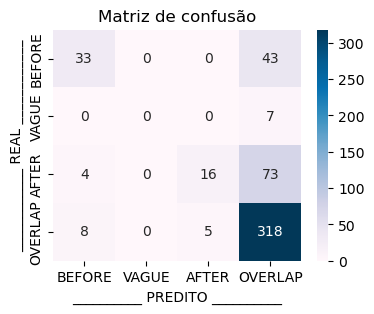

In [143]:
tb.tr.cm()

#### Teste

In [144]:
#Resumo do processamento
tb.tr.show_result = 'test'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE test
STATUS: VOTACAO | 35 regras ativas | (test)
	Sem Pares Candidato | Fechamento
Acurácia Anotadas:        54.0 de    70.0 (77.1%)
Total Não Anotadas:                  119.0
Acurácia Não Anotadas:    54.0 de   189.0 (28.6%)

TAXA COBERTURA:           70.0 de   169.0 (41.4%)

Quant Regras Processadas:  26
Total Sentenças Anotadas Task A:   81
Total Sentenças Anotadas sem predição:  59
Total Relações Anotadas Task A:  169
Total Relações Anotadas sem predição:  99






              precision    recall  f1-score   support

       AFTER      0.833     0.500     0.625        10
      BEFORE      0.556     0.500     0.526        10
     OVERLAP      0.800     0.917     0.854        48
       VAGUE      0.000     0.000     0.000         2

    accuracy                          0.771        70
   macro avg      0.547     0.479     0.501        70
weighted avg      0.747     0.771     0.750        70



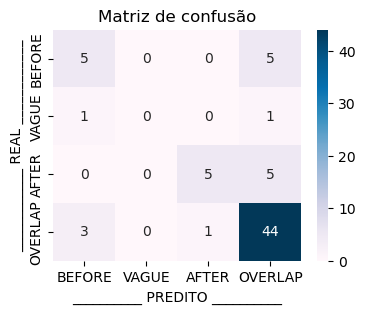

In [145]:
tb.tr.cm()

In [146]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,1000.0,OVERLAP,2.0,4.0,6.0,16.0,18.18,66.67


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    AFTER             1        5        6            1       71.43   
     OVERLAP          11       44       55          104       27.67   
     BEFORE            4        5        9           14       21.74   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    AFTER                      83.33  
     OVERLAP                    80.00  
     BEFORE                     55.56

# REGRAS MANUAIS - COM CLASSE DEFAULT

In [2]:
tb.tr.load_rules('rules/Final_Manuais.txt')
tb.tr.add_rule_class_default('OVERLAP')

As regras do arquivo rules/Final_Manuais.txt foram carregadas com sucesso. 
Total de regras: 35
Regra default adicionada.


## Primeira Regra Acionada 

In [3]:
tb.tr.processing_type = 'primeira_regra'  # 'primeira_regra' OR 'votacao'

### Sem estratégias

In [4]:
tb.tr.active_tlink_candidate = False
tb.tr.active_tlink_transitive = False
tb.tr.tlink_candidate.approach = 'ML'  # 'REGRAS_TREE', 'ML' or 'REGRAS'
tb.tr.tlink_candidate.threshold = 0.3

# processa todas as sentenças da task 'A'
tb.tr.process_rules()
tb.tr.status()

STATUS PROCESSAMENTO:
Task:                       A
Quant. Regras Ativas:       36
Ordenada por:               
Ordem reversa:              False
Tipo Processamento:         primeira_regra
Tlink Candidato Ativo?      False
Tlink Transitivo Ativo?     False
Tlink Candidato Approach:   
Tlink Candidato Threshold:  
Regras processadas?         SIM


#### Treino

In [5]:
# Resumo do processamento
tb.tr.show_result = 'train'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE ['train', 'train_test']
STATUS: PRIMEIRA_REGRA | 36 regras ativas | (['train', 'train_test'])
	Sem Pares Candidato | Sem Fechamento
Acurácia Anotadas:       819.0 de  1440.0 (56.9%)
Total Não Anotadas:                 1640.0
Acurácia Não Anotadas:   819.0 de  3080.0 (26.6%)

TAXA COBERTURA:          1440.0 de 1,440.0 (100.0%)

Quant Regras Processadas:  34
Total Sentenças Anotadas Task A:   645
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  1440
Total Relações Anotadas sem predição:  0






              precision    recall  f1-score   support

       AFTER      0.727     0.045     0.085       356
      BEFORE      0.762     0.115     0.200       278
     OVERLAP      0.560     0.982     0.714       785
       VAGUE      0.000     0.000     0.000        21

    accuracy                          0.569      1440
   macro avg      0.512     0.286     0.250      1440
weighted avg      0.632     0.569     0.449      1440



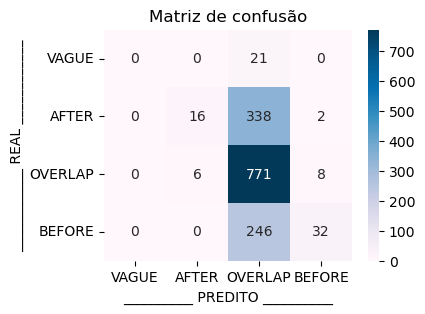

In [6]:
tb.tr.cm(extras=False)

In [7]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(
    1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,2000,OVERLAP,502.0,464.0,966.0,1100.0,22.46,48.03


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    BEFORE           10       32       42           35       41.56   
     AFTER             6       16       22            8       53.33   
     OVERLAP         605      771     1376         1597       25.93   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    BEFORE                     76.19  
     AFTER                      72.73  
     OVERLAP                    56.03

#### Teste

In [8]:
# Resumo do processamento
tb.tr.show_result = 'test'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE test
STATUS: PRIMEIRA_REGRA | 36 regras ativas | (test)
	Sem Pares Candidato | Sem Fechamento
Acurácia Anotadas:       113.0 de   169.0 (66.9%)
Total Não Anotadas:                  285.0
Acurácia Não Anotadas:   113.0 de   454.0 (24.9%)

TAXA COBERTURA:          169.0 de   169.0 (100.0%)

Quant Regras Processadas:  24
Total Sentenças Anotadas Task A:   81
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  169
Total Relações Anotadas sem predição:  0






              precision    recall  f1-score   support

       AFTER      1.000     0.133     0.235        30
      BEFORE      0.571     0.200     0.296        20
     OVERLAP      0.665     0.972     0.789       108
       VAGUE      0.000     0.000     0.000        11

    accuracy                          0.669       169
   macro avg      0.559     0.326     0.330       169
weighted avg      0.670     0.669     0.581       169



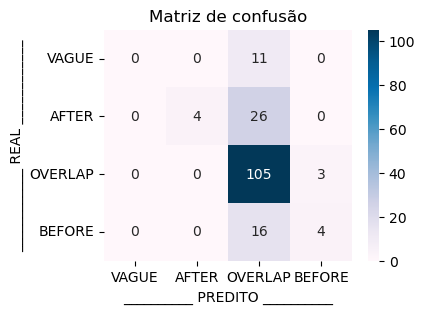

In [9]:
tb.tr.cm(extras=False)

In [10]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(
    1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,2000,OVERLAP,44.0,65.0,109.0,183.0,22.26,59.63


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    AFTER             0        4        4            1       80.00   
     OVERLAP          53      105      158          270       24.53   
     BEFORE            3        4        7           14       19.05   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    AFTER                     100.00  
     OVERLAP                    66.46  
     BEFORE                     57.14

### +Fechamento Temporal

In [11]:
tb.tr.active_tlink_candidate = False
tb.tr.active_tlink_transitive = True
tb.tr.tlink_candidate.approach = 'ML'  # 'REGRAS_TREE', 'ML' or 'REGRAS'
tb.tr.tlink_candidate.threshold = 0.3

# processa todas as sentenças da task 'A'
tb.tr.process_rules()
tb.tr.status()

STATUS PROCESSAMENTO:
Task:                       A
Quant. Regras Ativas:       36
Ordenada por:               
Ordem reversa:              False
Tipo Processamento:         primeira_regra
Tlink Candidato Ativo?      False
Tlink Transitivo Ativo?     True
Tlink Candidato Approach:   
Tlink Candidato Threshold:  
Regras processadas?         SIM


#### Treino

In [12]:
# Resumo do processamento
tb.tr.show_result = 'train'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE ['train', 'train_test']
STATUS: PRIMEIRA_REGRA | 36 regras ativas | (['train', 'train_test'])
	Sem Pares Candidato | Fechamento
Acurácia Anotadas:       819.0 de  1440.0 (56.9%)
Total Não Anotadas:                 1640.0
Acurácia Não Anotadas:   819.0 de  3080.0 (26.6%)

TAXA COBERTURA:          1440.0 de 1,440.0 (100.0%)

Quant Regras Processadas:  34
Total Sentenças Anotadas Task A:   645
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  1440
Total Relações Anotadas sem predição:  0






              precision    recall  f1-score   support

       AFTER      0.727     0.045     0.085       356
      BEFORE      0.762     0.115     0.200       278
     OVERLAP      0.560     0.982     0.714       785
       VAGUE      0.000     0.000     0.000        21

    accuracy                          0.569      1440
   macro avg      0.512     0.286     0.250      1440
weighted avg      0.632     0.569     0.449      1440



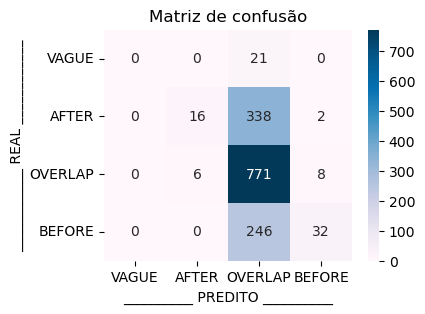

In [13]:
tb.tr.cm(extras=False)

#### Teste

In [14]:
# Resumo do processamento
tb.tr.show_result = 'test'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE test
STATUS: PRIMEIRA_REGRA | 36 regras ativas | (test)
	Sem Pares Candidato | Fechamento
Acurácia Anotadas:       113.0 de   169.0 (66.9%)
Total Não Anotadas:                  285.0
Acurácia Não Anotadas:   113.0 de   454.0 (24.9%)

TAXA COBERTURA:          169.0 de   169.0 (100.0%)

Quant Regras Processadas:  24
Total Sentenças Anotadas Task A:   81
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  169
Total Relações Anotadas sem predição:  0






              precision    recall  f1-score   support

       AFTER      1.000     0.133     0.235        30
      BEFORE      0.571     0.200     0.296        20
     OVERLAP      0.665     0.972     0.789       108
       VAGUE      0.000     0.000     0.000        11

    accuracy                          0.669       169
   macro avg      0.559     0.326     0.330       169
weighted avg      0.670     0.669     0.581       169



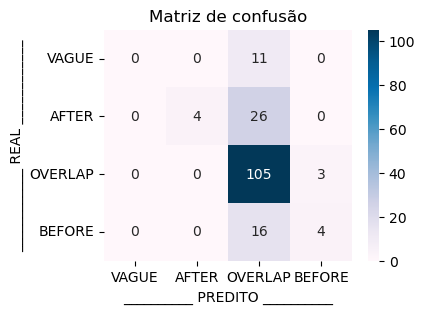

In [15]:
tb.tr.cm(extras=False)

In [16]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(
    1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,2000,OVERLAP,44.0,65.0,109.0,183.0,22.26,59.63


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    AFTER             0        4        4            1       80.00   
     OVERLAP          53      105      158          270       24.53   
     BEFORE            3        4        7           14       19.05   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    AFTER                     100.00  
     OVERLAP                    66.46  
     BEFORE                     57.14

## Votação

In [17]:
tb.tr.processing_type = 'votacao'  # 'primeira_regra' OR 'votacao'

### Sem estratégias

In [18]:
tb.tr.active_tlink_candidate = False
tb.tr.active_tlink_transitive = False
tb.tr.tlink_candidate.approach = 'ML'  # 'REGRAS_TREE', 'ML' or 'REGRAS'
tb.tr.tlink_candidate.threshold = 0.3

# processa todas as sentenças da task 'A'
tb.tr.process_rules()
tb.tr.status()

STATUS PROCESSAMENTO:
Task:                       A
Quant. Regras Ativas:       36
Ordenada por:               
Ordem reversa:              False
Tipo Processamento:         votacao
Tlink Candidato Ativo?      False
Tlink Transitivo Ativo?     False
Tlink Candidato Approach:   
Tlink Candidato Threshold:  
Regras processadas?         SIM


#### Treino

In [19]:
# Resumo do processamento
tb.tr.show_result = 'train'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE ['train', 'train_test']
STATUS: VOTACAO | 36 regras ativas | (['train', 'train_test'])
	Sem Pares Candidato | Sem Fechamento
Acurácia Anotadas:       821.0 de  1440.0 (57.0%)
Total Não Anotadas:                 1640.0
Acurácia Não Anotadas:   821.0 de  3080.0 (26.7%)

TAXA COBERTURA:          1440.0 de 1,440.0 (100.0%)

Quant Regras Processadas:  34
Total Sentenças Anotadas Task A:   645
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  1440
Total Relações Anotadas sem predição:  0






              precision    recall  f1-score   support

       AFTER      0.800     0.045     0.085       356
      BEFORE      0.762     0.115     0.200       278
     OVERLAP      0.561     0.985     0.715       785
       VAGUE      0.000     0.000     0.000        21

    accuracy                          0.570      1440
   macro avg      0.531     0.286     0.250      1440
weighted avg      0.651     0.570     0.449      1440



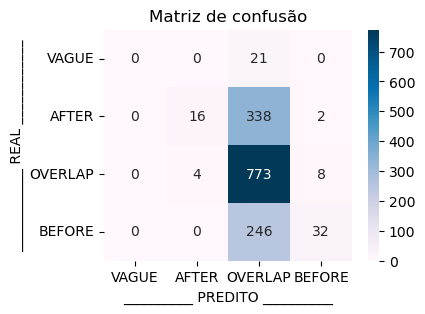

In [20]:
tb.tr.cm(extras=False)

In [21]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(
    1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,2000,OVERLAP,502.0,464.0,966.0,1100.0,22.46,48.03


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    AFTER             4       16       20            7       59.26   
     BEFORE           10       32       42           35       41.56   
     OVERLAP         605      773     1378         1598       25.97   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    AFTER                      80.00  
     BEFORE                     76.19  
     OVERLAP                    56.10

#### Teste

In [22]:
# Resumo do processamento
tb.tr.show_result = 'test'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE test
STATUS: VOTACAO | 36 regras ativas | (test)
	Sem Pares Candidato | Sem Fechamento
Acurácia Anotadas:       113.0 de   169.0 (66.9%)
Total Não Anotadas:                  285.0
Acurácia Não Anotadas:   113.0 de   454.0 (24.9%)

TAXA COBERTURA:          169.0 de   169.0 (100.0%)

Quant Regras Processadas:  24
Total Sentenças Anotadas Task A:   81
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  169
Total Relações Anotadas sem predição:  0






              precision    recall  f1-score   support

       AFTER      1.000     0.133     0.235        30
      BEFORE      0.571     0.200     0.296        20
     OVERLAP      0.665     0.972     0.789       108
       VAGUE      0.000     0.000     0.000        11

    accuracy                          0.669       169
   macro avg      0.559     0.326     0.330       169
weighted avg      0.670     0.669     0.581       169



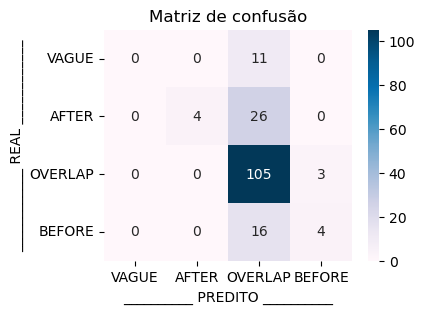

In [23]:
tb.tr.cm(extras=False)

In [24]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(
    1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,2000,OVERLAP,44.0,65.0,109.0,183.0,22.26,59.63


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    AFTER           0.0      4.0      4.0          0.0      100.00   
     OVERLAP        53.0    105.0    158.0        271.0       24.48   
     BEFORE          3.0      4.0      7.0         14.0       19.05   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    AFTER                     100.00  
     OVERLAP                    66.46  
     BEFORE                     57.14

### +Fechamento Temporal

In [25]:
tb.tr.active_tlink_candidate = False
tb.tr.active_tlink_transitive = True
tb.tr.tlink_candidate.approach = 'ML'  # 'REGRAS_TREE', 'ML' or 'REGRAS'
tb.tr.tlink_candidate.threshold = 0.3

# processa todas as sentenças da task 'A'
tb.tr.process_rules()
tb.tr.status()

STATUS PROCESSAMENTO:
Task:                       A
Quant. Regras Ativas:       36
Ordenada por:               
Ordem reversa:              False
Tipo Processamento:         votacao
Tlink Candidato Ativo?      False
Tlink Transitivo Ativo?     True
Tlink Candidato Approach:   
Tlink Candidato Threshold:  
Regras processadas?         SIM


#### Treino

In [26]:
# Resumo do processamento
tb.tr.show_result = 'train'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE ['train', 'train_test']
STATUS: VOTACAO | 36 regras ativas | (['train', 'train_test'])
	Sem Pares Candidato | Fechamento
Acurácia Anotadas:       821.0 de  1440.0 (57.0%)
Total Não Anotadas:                 1640.0
Acurácia Não Anotadas:   821.0 de  3080.0 (26.7%)

TAXA COBERTURA:          1440.0 de 1,440.0 (100.0%)

Quant Regras Processadas:  34
Total Sentenças Anotadas Task A:   645
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  1440
Total Relações Anotadas sem predição:  0






              precision    recall  f1-score   support

       AFTER      0.800     0.045     0.085       356
      BEFORE      0.762     0.115     0.200       278
     OVERLAP      0.561     0.985     0.715       785
       VAGUE      0.000     0.000     0.000        21

    accuracy                          0.570      1440
   macro avg      0.531     0.286     0.250      1440
weighted avg      0.651     0.570     0.449      1440



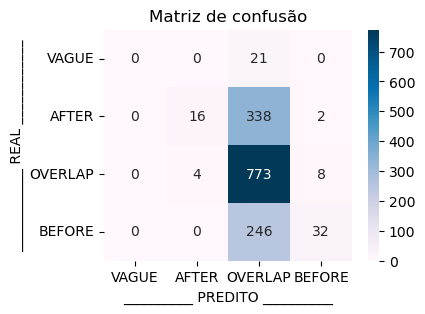

In [27]:
tb.tr.cm(extras=False)

#### Teste

In [28]:
# Resumo do processamento
tb.tr.show_result = 'test'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE test
STATUS: VOTACAO | 36 regras ativas | (test)
	Sem Pares Candidato | Fechamento
Acurácia Anotadas:       113.0 de   169.0 (66.9%)
Total Não Anotadas:                  285.0
Acurácia Não Anotadas:   113.0 de   454.0 (24.9%)

TAXA COBERTURA:          169.0 de   169.0 (100.0%)

Quant Regras Processadas:  24
Total Sentenças Anotadas Task A:   81
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  169
Total Relações Anotadas sem predição:  0






              precision    recall  f1-score   support

       AFTER      1.000     0.133     0.235        30
      BEFORE      0.571     0.200     0.296        20
     OVERLAP      0.665     0.972     0.789       108
       VAGUE      0.000     0.000     0.000        11

    accuracy                          0.669       169
   macro avg      0.559     0.326     0.330       169
weighted avg      0.670     0.669     0.581       169



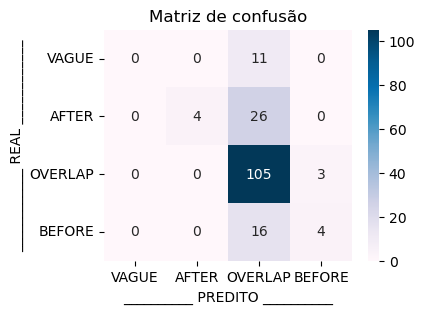

In [29]:
tb.tr.cm(extras=False)

In [30]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(
    1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,2000,OVERLAP,44.0,65.0,109.0,183.0,22.26,59.63


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    AFTER           0.0      4.0      4.0          0.0      100.00   
     OVERLAP        53.0    105.0    158.0        271.0       24.48   
     BEFORE          3.0      4.0      7.0         14.0       19.05   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    AFTER                     100.00  
     OVERLAP                    66.46  
     BEFORE                     57.14

# TODOS SETRULES

In [147]:
tb.tr.load_rules('rules/FINAL_Combinados_Todos.txt')

As regras do arquivo rules/FINAL_Combinados_Todos.txt foram carregadas com sucesso. 
Total de regras: 980


## Primeira Regra Acionada 

In [148]:
tb.tr.processing_type = 'primeira_regra'  # 'primeira_regra' OR 'votacao'

### Sem estratégias

In [149]:
tb.tr.active_tlink_candidate  = False
tb.tr.active_tlink_transitive = False
tb.tr.tlink_candidate.approach = 'ML'  # 'REGRAS_TREE', 'ML' or 'REGRAS'
tb.tr.tlink_candidate.threshold = 0.3

#processa todas as sentenças da task 'A'
tb.tr.process_rules()
tb.tr.status()

STATUS PROCESSAMENTO:
Task:                       A
Quant. Regras Ativas:       980
Ordenada por:               
Ordem reversa:              False
Tipo Processamento:         primeira_regra
Tlink Candidato Ativo?      False
Tlink Transitivo Ativo?     False
Tlink Candidato Approach:   
Tlink Candidato Threshold:  
Regras processadas?         SIM


#### Treino

In [150]:
#Resumo do processamento
tb.tr.show_result = 'train'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE ['train', 'train_test']
STATUS: PRIMEIRA_REGRA | 980 regras ativas | (['train', 'train_test'])
	Sem Pares Candidato | Sem Fechamento
Acurácia Anotadas:       1286.0 de  1440.0 (89.3%)
Total Não Anotadas:                 1640.0
Acurácia Não Anotadas:   1286.0 de  3080.0 (41.8%)

TAXA COBERTURA:          1440.0 de 1,440.0 (100.0%)

Quant Regras Processadas:  646
Total Sentenças Anotadas Task A:   645
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  1440
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.953     0.906     0.929       360
           BEFORE      0.978     0.645     0.778       279
BEFORE-OR-OVERLAP      1.000     0.750     0.857         8
          OVERLAP      0.851     0.997     0.918       767
 OVERLAP-OR-AFTER      1.000     1.000     1.000         5
            VAGUE      1.000     0.190     0.320        21

         accuracy                          0.893      1440
        macro avg      0.964     0.748     0.800      1440
     weighted avg      0.905     0.893     0.885      1440



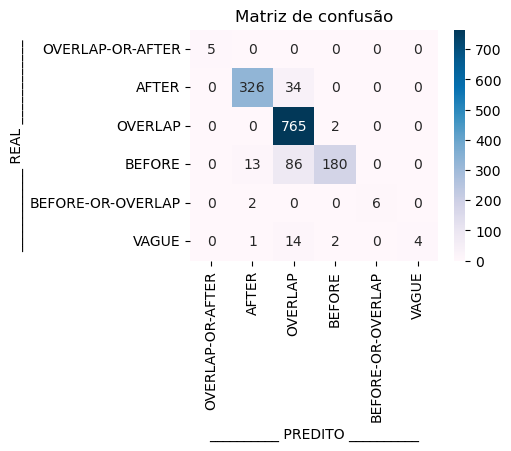

In [151]:
tb.tr.cm()

In [152]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,2000,OVERLAP,59.0,19.0,78.0,74.0,12.5,24.36


Resultado               Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                          
A    VAGUE                0.0      4.0      4.0          1.0       80.00   
     OVERLAP-OR-AFTER     0.0      5.0      5.0          1.0       83.33   
     BEFORE-OR-OVERLAP    0.0      6.0      6.0          0.0      100.00   
     BEFORE               4.0    180.0    184.0        112.0       60.81   
     AFTER               16.0    326.0    342.0        239.0       56.11   
     OVERLAP            134.0    765.0    899.0       1287.0       35.00   

Resultado               pct_acerto_anotado  
task relType_pred                           
A    VAGUE                          100.00  
     OVERLAP-OR-AFTER               100.00  
     BEFORE-OR-OVERLAP              100.00  
     BEFORE                          97.83  
     AFTER                           95.32  
     OVERLAP                         85.09

#### Teste

In [153]:
#Resumo do processamento
tb.tr.show_result = 'test'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE test
STATUS: PRIMEIRA_REGRA | 980 regras ativas | (test)
	Sem Pares Candidato | Sem Fechamento
Acurácia Anotadas:       107.0 de   169.0 (63.3%)
Total Não Anotadas:                  285.0
Acurácia Não Anotadas:   107.0 de   454.0 (23.6%)

TAXA COBERTURA:          169.0 de   169.0 (100.0%)

Quant Regras Processadas:  214
Total Sentenças Anotadas Task A:   81
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  169
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.273     0.290     0.281        31
           BEFORE      0.600     0.300     0.400        20
BEFORE-OR-OVERLAP      0.000     0.000     0.000         1
          OVERLAP      0.730     0.868     0.793       106
            VAGUE      0.000     0.000     0.000        11

         accuracy                          0.633       169
        macro avg      0.321     0.292     0.295       169
     weighted avg      0.579     0.633     0.596       169



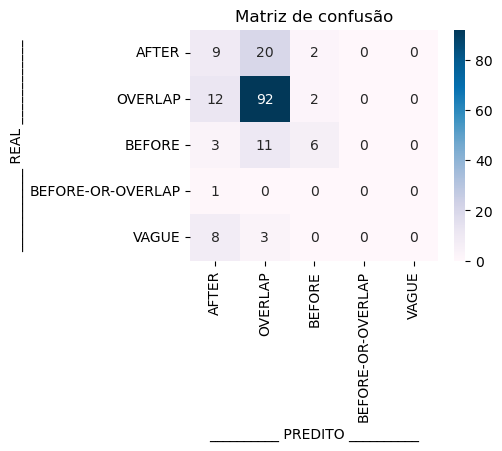

In [154]:
tb.tr.cm()

In [155]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,2000,OVERLAP,4.0,2.0,6.0,12.0,11.11,33.33


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    OVERLAP          34       92      126          226       26.14   
     BEFORE            4        6       10            7       35.29   
     AFTER            24        9       33           52       10.59   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    OVERLAP                    73.02  
     BEFORE                     60.00  
     AFTER                      27.27

### +Fechamento Temporal

In [156]:
tb.tr.active_tlink_candidate  = False
tb.tr.active_tlink_transitive = True
tb.tr.tlink_candidate.approach = 'ML'  # 'REGRAS_TREE', 'ML' or 'REGRAS'
tb.tr.tlink_candidate.threshold = 0.3

#processa todas as sentenças da task 'A'
tb.tr.process_rules()
tb.tr.status()

STATUS PROCESSAMENTO:
Task:                       A
Quant. Regras Ativas:       980
Ordenada por:               
Ordem reversa:              False
Tipo Processamento:         primeira_regra
Tlink Candidato Ativo?      False
Tlink Transitivo Ativo?     True
Tlink Candidato Approach:   
Tlink Candidato Threshold:  
Regras processadas?         SIM


#### Treino

In [157]:
#Resumo do processamento
tb.tr.show_result = 'train'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE ['train', 'train_test']
STATUS: PRIMEIRA_REGRA | 980 regras ativas | (['train', 'train_test'])
	Sem Pares Candidato | Fechamento
Acurácia Anotadas:       1286.0 de  1440.0 (89.3%)
Total Não Anotadas:                 1640.0
Acurácia Não Anotadas:   1286.0 de  3080.0 (41.8%)

TAXA COBERTURA:          1440.0 de 1,440.0 (100.0%)

Quant Regras Processadas:  646
Total Sentenças Anotadas Task A:   645
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  1440
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.953     0.906     0.929       360
           BEFORE      0.978     0.645     0.778       279
BEFORE-OR-OVERLAP      1.000     0.750     0.857         8
          OVERLAP      0.851     0.997     0.918       767
 OVERLAP-OR-AFTER      1.000     1.000     1.000         5
            VAGUE      1.000     0.190     0.320        21

         accuracy                          0.893      1440
        macro avg      0.964     0.748     0.800      1440
     weighted avg      0.905     0.893     0.885      1440



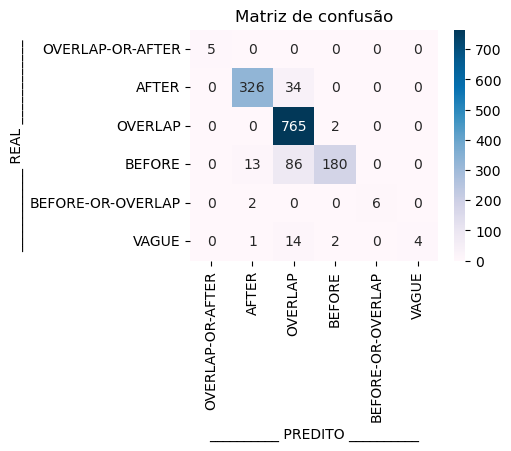

In [158]:
tb.tr.cm()

#### Teste

In [159]:
#Resumo do processamento
tb.tr.show_result = 'test'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE test
STATUS: PRIMEIRA_REGRA | 980 regras ativas | (test)
	Sem Pares Candidato | Fechamento
Acurácia Anotadas:       107.0 de   169.0 (63.3%)
Total Não Anotadas:                  285.0
Acurácia Não Anotadas:   107.0 de   454.0 (23.6%)

TAXA COBERTURA:          169.0 de   169.0 (100.0%)

Quant Regras Processadas:  214
Total Sentenças Anotadas Task A:   81
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  169
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.273     0.290     0.281        31
           BEFORE      0.600     0.300     0.400        20
BEFORE-OR-OVERLAP      0.000     0.000     0.000         1
          OVERLAP      0.730     0.868     0.793       106
            VAGUE      0.000     0.000     0.000        11

         accuracy                          0.633       169
        macro avg      0.321     0.292     0.295       169
     weighted avg      0.579     0.633     0.596       169



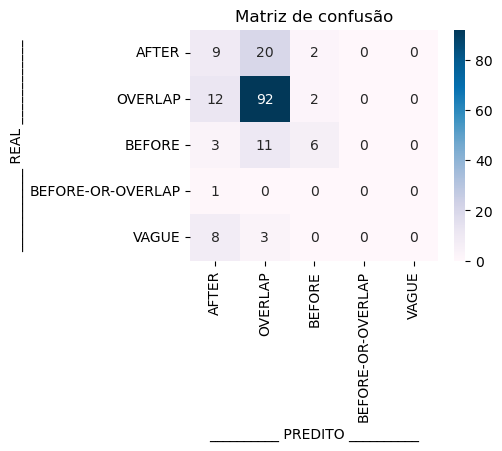

In [160]:
tb.tr.cm()

In [161]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,2000,OVERLAP,4.0,2.0,6.0,12.0,11.11,33.33


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    OVERLAP          34       92      126          226       26.14   
     BEFORE            4        6       10            7       35.29   
     AFTER            24        9       33           52       10.59   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    OVERLAP                    73.02  
     BEFORE                     60.00  
     AFTER                      27.27

## Votação

In [162]:
tb.tr.processing_type = 'votacao'  # 'primeira_regra' OR 'votacao'

### Sem estratégias

In [163]:
tb.tr.active_tlink_candidate  = False
tb.tr.active_tlink_transitive = False
tb.tr.tlink_candidate.approach = 'ML'  # 'REGRAS_TREE', 'ML' or 'REGRAS'
tb.tr.tlink_candidate.threshold = 0.3

#processa todas as sentenças da task 'A'
tb.tr.process_rules()
tb.tr.status()

STATUS PROCESSAMENTO:
Task:                       A
Quant. Regras Ativas:       980
Ordenada por:               
Ordem reversa:              False
Tipo Processamento:         votacao
Tlink Candidato Ativo?      False
Tlink Transitivo Ativo?     False
Tlink Candidato Approach:   
Tlink Candidato Threshold:  
Regras processadas?         SIM


#### Treino

In [164]:
#Resumo do processamento
tb.tr.show_result = 'train'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE ['train', 'train_test']
STATUS: VOTACAO | 980 regras ativas | (['train', 'train_test'])
	Sem Pares Candidato | Sem Fechamento
Acurácia Anotadas:       1227.0 de  1440.0 (85.2%)
Total Não Anotadas:                 1640.0
Acurácia Não Anotadas:   1227.0 de  3080.0 (39.8%)

TAXA COBERTURA:          1440.0 de 1,440.0 (100.0%)

Quant Regras Processadas:  660
Total Sentenças Anotadas Task A:   645
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  1440
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.941     0.805     0.868       359
           BEFORE      0.947     0.581     0.720       279
BEFORE-OR-OVERLAP      1.000     0.667     0.800         3
          OVERLAP      0.805     0.991     0.888       775
 OVERLAP-OR-AFTER      1.000     1.000     1.000         3
            VAGUE      1.000     0.143     0.250        21

         accuracy                          0.852      1440
        macro avg      0.949     0.698     0.754      1440
     weighted avg      0.870     0.852     0.841      1440



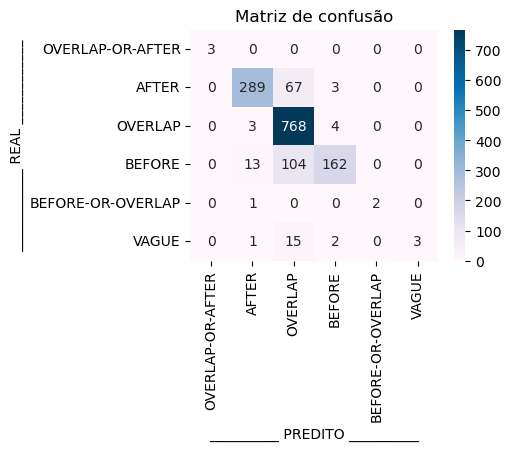

In [165]:
tb.tr.cm()

In [166]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,2000,OVERLAP,59.0,19.0,78.0,74.0,12.5,24.36


Resultado               Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                          
A    VAGUE                0.0      3.0      3.0          0.0      100.00   
     OVERLAP-OR-AFTER     0.0      3.0      3.0          1.0       75.00   
     BEFORE-OR-OVERLAP    0.0      2.0      2.0          0.0      100.00   
     BEFORE               9.0    162.0    171.0         82.0       64.03   
     AFTER               18.0    289.0    307.0        166.0       61.10   
     OVERLAP            186.0    768.0    954.0       1391.0       32.75   

Resultado               pct_acerto_anotado  
task relType_pred                           
A    VAGUE                          100.00  
     OVERLAP-OR-AFTER               100.00  
     BEFORE-OR-OVERLAP              100.00  
     BEFORE                          94.74  
     AFTER                           94.14  
     OVERLAP                         80.50

#### Teste

In [167]:
#Resumo do processamento
tb.tr.show_result = 'test'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE test
STATUS: VOTACAO | 980 regras ativas | (test)
	Sem Pares Candidato | Sem Fechamento
Acurácia Anotadas:       114.0 de   169.0 (67.5%)
Total Não Anotadas:                  285.0
Acurácia Não Anotadas:   114.0 de   454.0 (25.1%)

TAXA COBERTURA:          169.0 de   169.0 (100.0%)

Quant Regras Processadas:  219
Total Sentenças Anotadas Task A:   81
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  169
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.355     0.367     0.361        30
           BEFORE      0.750     0.300     0.429        20
BEFORE-OR-OVERLAP      0.000     0.000     0.000         1
          OVERLAP      0.746     0.907     0.819       107
            VAGUE      0.000     0.000     0.000        11

         accuracy                          0.675       169
        macro avg      0.370     0.315     0.322       169
     weighted avg      0.624     0.675     0.633       169



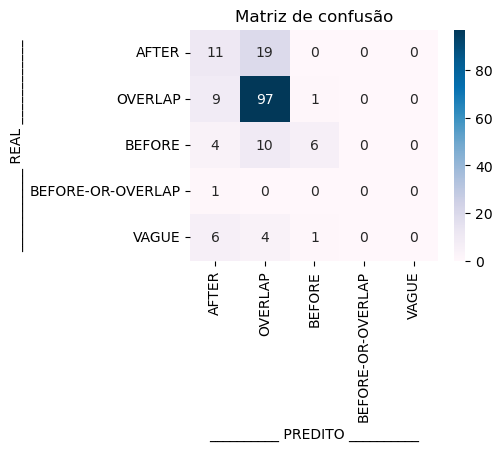

In [168]:
tb.tr.cm()

In [169]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,2000,OVERLAP,4.0,2.0,6.0,12.0,11.11,33.33


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    BEFORE            2        6        8            5       46.15   
     OVERLAP          33       97      130          247       25.73   
     AFTER            20       11       31           33       17.19   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    BEFORE                     75.00  
     OVERLAP                    74.62  
     AFTER                      35.48

### +Fechamento Temporal

In [170]:
tb.tr.active_tlink_candidate  = False
tb.tr.active_tlink_transitive = True
tb.tr.tlink_candidate.approach = 'ML'  # 'REGRAS_TREE', 'ML' or 'REGRAS'
tb.tr.tlink_candidate.threshold = 0.3

#processa todas as sentenças da task 'A'
tb.tr.process_rules()
tb.tr.status()

STATUS PROCESSAMENTO:
Task:                       A
Quant. Regras Ativas:       980
Ordenada por:               
Ordem reversa:              False
Tipo Processamento:         votacao
Tlink Candidato Ativo?      False
Tlink Transitivo Ativo?     True
Tlink Candidato Approach:   
Tlink Candidato Threshold:  
Regras processadas?         SIM


#### Treino

In [171]:
#Resumo do processamento
tb.tr.show_result = 'train'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE ['train', 'train_test']
STATUS: VOTACAO | 980 regras ativas | (['train', 'train_test'])
	Sem Pares Candidato | Fechamento
Acurácia Anotadas:       1227.0 de  1440.0 (85.2%)
Total Não Anotadas:                 1640.0
Acurácia Não Anotadas:   1227.0 de  3080.0 (39.8%)

TAXA COBERTURA:          1440.0 de 1,440.0 (100.0%)

Quant Regras Processadas:  660
Total Sentenças Anotadas Task A:   645
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  1440
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.941     0.805     0.868       359
           BEFORE      0.947     0.581     0.720       279
BEFORE-OR-OVERLAP      1.000     0.667     0.800         3
          OVERLAP      0.805     0.991     0.888       775
 OVERLAP-OR-AFTER      1.000     1.000     1.000         3
            VAGUE      1.000     0.143     0.250        21

         accuracy                          0.852      1440
        macro avg      0.949     0.698     0.754      1440
     weighted avg      0.870     0.852     0.841      1440



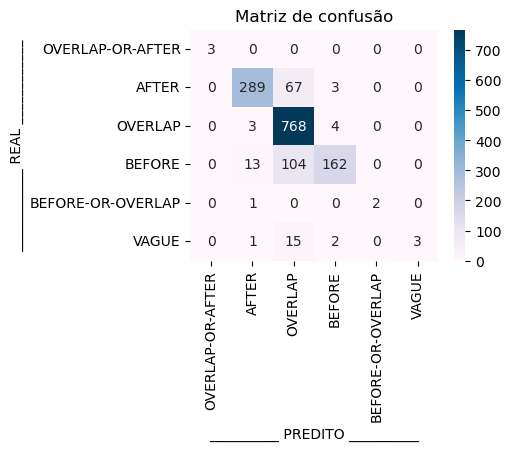

In [172]:
tb.tr.cm()

#### Teste

In [173]:
#Resumo do processamento
tb.tr.show_result = 'test'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE test
STATUS: VOTACAO | 980 regras ativas | (test)
	Sem Pares Candidato | Fechamento
Acurácia Anotadas:       114.0 de   169.0 (67.5%)
Total Não Anotadas:                  285.0
Acurácia Não Anotadas:   114.0 de   454.0 (25.1%)

TAXA COBERTURA:          169.0 de   169.0 (100.0%)

Quant Regras Processadas:  219
Total Sentenças Anotadas Task A:   81
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  169
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.355     0.367     0.361        30
           BEFORE      0.750     0.300     0.429        20
BEFORE-OR-OVERLAP      0.000     0.000     0.000         1
          OVERLAP      0.746     0.907     0.819       107
            VAGUE      0.000     0.000     0.000        11

         accuracy                          0.675       169
        macro avg      0.370     0.315     0.322       169
     weighted avg      0.624     0.675     0.633       169



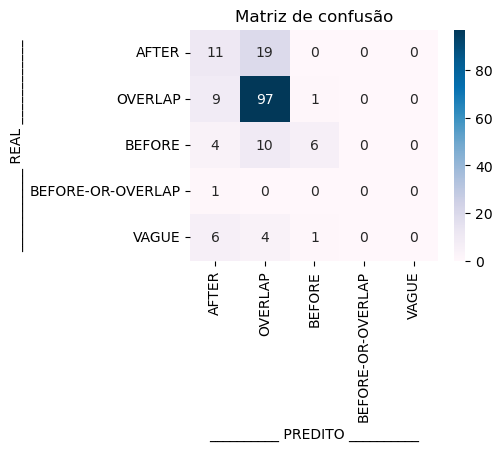

In [174]:
tb.tr.cm()

In [175]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,2000,OVERLAP,4.0,2.0,6.0,12.0,11.11,33.33


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    BEFORE            2        6        8            5       46.15   
     OVERLAP          33       97      130          247       25.73   
     AFTER            20       11       31           33       17.19   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    BEFORE                     75.00  
     OVERLAP                    74.62  
     AFTER                      35.48

# COMBINADO DE 2 EM 2

In [176]:
tb.tr.load_rules('rules/FINAL_Combinados_2_em_2.txt')

As regras do arquivo rules/FINAL_Combinados_2_em_2.txt foram carregadas com sucesso. 
Total de regras: 797


## Primeira Regra Acionada 

In [177]:
tb.tr.processing_type = 'primeira_regra'  # 'primeira_regra' OR 'votacao'

### Sem estratégias

In [178]:
tb.tr.active_tlink_candidate  = False
tb.tr.active_tlink_transitive = False
tb.tr.tlink_candidate.approach = 'ML'  # 'REGRAS_TREE', 'ML' or 'REGRAS'
tb.tr.tlink_candidate.threshold = 0.3

#processa todas as sentenças da task 'A'
tb.tr.process_rules()
tb.tr.status()

STATUS PROCESSAMENTO:
Task:                       A
Quant. Regras Ativas:       797
Ordenada por:               
Ordem reversa:              False
Tipo Processamento:         primeira_regra
Tlink Candidato Ativo?      False
Tlink Transitivo Ativo?     False
Tlink Candidato Approach:   
Tlink Candidato Threshold:  
Regras processadas?         SIM


#### Treino

In [179]:
#Resumo do processamento
tb.tr.show_result = 'train'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE ['train', 'train_test']
STATUS: PRIMEIRA_REGRA | 797 regras ativas | (['train', 'train_test'])
	Sem Pares Candidato | Sem Fechamento
Acurácia Anotadas:       1274.0 de  1440.0 (88.5%)
Total Não Anotadas:                 1640.0
Acurácia Não Anotadas:   1274.0 de  3080.0 (41.4%)

TAXA COBERTURA:          1440.0 de 1,440.0 (100.0%)

Quant Regras Processadas:  616
Total Sentenças Anotadas Task A:   645
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  1440
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.946     0.917     0.931       361
           BEFORE      0.976     0.595     0.739       279
BEFORE-OR-OVERLAP      0.000     0.000     0.000         2
          OVERLAP      0.844     0.999     0.915       776
 OVERLAP-OR-AFTER      0.000     0.000     0.000         1
            VAGUE      1.000     0.095     0.174        21

         accuracy                          0.885      1440
        macro avg      0.628     0.434     0.460      1440
     weighted avg      0.896     0.885     0.872      1440



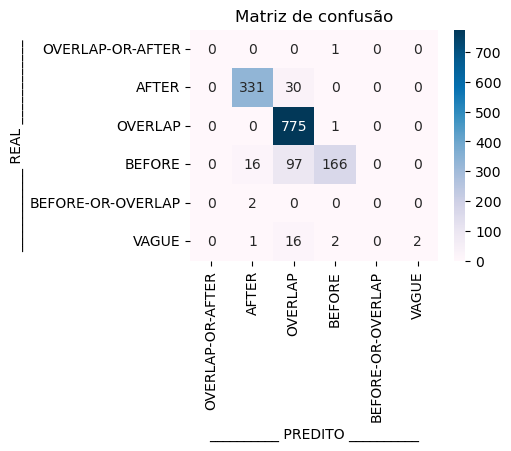

In [180]:
tb.tr.cm()

In [181]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,2000,OVERLAP,108.0,45.0,153.0,119.0,16.54,29.41


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    VAGUE           0.0      2.0      2.0          0.0      100.00   
     BEFORE          4.0    166.0    170.0         97.0       62.17   
     AFTER          19.0    331.0    350.0        258.0       54.44   
     OVERLAP       143.0    775.0    918.0       1285.0       35.18   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    VAGUE                     100.00  
     BEFORE                     97.65  
     AFTER                      94.57  
     OVERLAP                    84.42

#### Teste

In [182]:
#Resumo do processamento
tb.tr.show_result = 'test'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE test
STATUS: PRIMEIRA_REGRA | 797 regras ativas | (test)
	Sem Pares Candidato | Sem Fechamento
Acurácia Anotadas:       111.0 de   169.0 (65.7%)
Total Não Anotadas:                  285.0
Acurácia Não Anotadas:   111.0 de   454.0 (24.4%)

TAXA COBERTURA:          169.0 de   169.0 (100.0%)

Quant Regras Processadas:  192
Total Sentenças Anotadas Task A:   81
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  169
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.290     0.300     0.295        30
           BEFORE      0.700     0.350     0.467        20
BEFORE-OR-OVERLAP      0.000     0.000     0.000         1
          OVERLAP      0.742     0.888     0.809       107
            VAGUE      0.000     0.000     0.000        11

         accuracy                          0.657       169
        macro avg      0.347     0.308     0.314       169
     weighted avg      0.604     0.657     0.620       169



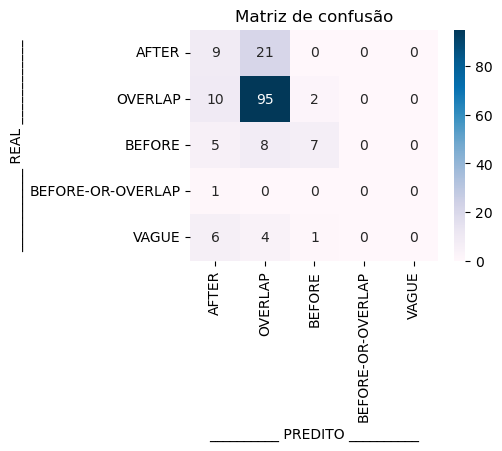

In [183]:
tb.tr.cm()

In [184]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,2000,OVERLAP,6.0,4.0,10.0,23.0,12.12,40.0


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    OVERLAP          33       95      128          228       26.69   
     BEFORE            3        7       10           10       35.00   
     AFTER            22        9       31           47       11.54   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    OVERLAP                    74.22  
     BEFORE                     70.00  
     AFTER                      29.03

### +Fechamento Temporal

In [185]:
tb.tr.active_tlink_candidate  = False
tb.tr.active_tlink_transitive = True
tb.tr.tlink_candidate.approach = 'ML'  # 'REGRAS_TREE', 'ML' or 'REGRAS'
tb.tr.tlink_candidate.threshold = 0.3

#processa todas as sentenças da task 'A'
tb.tr.process_rules()
tb.tr.status()

STATUS PROCESSAMENTO:
Task:                       A
Quant. Regras Ativas:       797
Ordenada por:               
Ordem reversa:              False
Tipo Processamento:         primeira_regra
Tlink Candidato Ativo?      False
Tlink Transitivo Ativo?     True
Tlink Candidato Approach:   
Tlink Candidato Threshold:  
Regras processadas?         SIM


#### Treino

In [186]:
#Resumo do processamento
tb.tr.show_result = 'train'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE ['train', 'train_test']
STATUS: PRIMEIRA_REGRA | 797 regras ativas | (['train', 'train_test'])
	Sem Pares Candidato | Fechamento
Acurácia Anotadas:       1274.0 de  1440.0 (88.5%)
Total Não Anotadas:                 1640.0
Acurácia Não Anotadas:   1274.0 de  3080.0 (41.4%)

TAXA COBERTURA:          1440.0 de 1,440.0 (100.0%)

Quant Regras Processadas:  616
Total Sentenças Anotadas Task A:   645
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  1440
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.946     0.917     0.931       361
           BEFORE      0.976     0.595     0.739       279
BEFORE-OR-OVERLAP      0.000     0.000     0.000         2
          OVERLAP      0.844     0.999     0.915       776
 OVERLAP-OR-AFTER      0.000     0.000     0.000         1
            VAGUE      1.000     0.095     0.174        21

         accuracy                          0.885      1440
        macro avg      0.628     0.434     0.460      1440
     weighted avg      0.896     0.885     0.872      1440



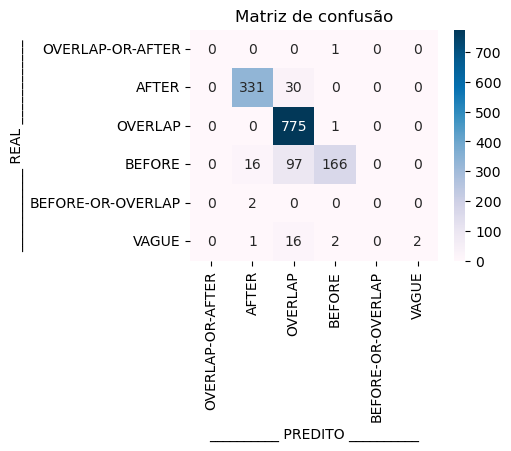

In [187]:
tb.tr.cm()

#### Teste

In [188]:
#Resumo do processamento
tb.tr.show_result = 'test'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE test
STATUS: PRIMEIRA_REGRA | 797 regras ativas | (test)
	Sem Pares Candidato | Fechamento
Acurácia Anotadas:       111.0 de   169.0 (65.7%)
Total Não Anotadas:                  285.0
Acurácia Não Anotadas:   111.0 de   454.0 (24.4%)

TAXA COBERTURA:          169.0 de   169.0 (100.0%)

Quant Regras Processadas:  192
Total Sentenças Anotadas Task A:   81
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  169
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.290     0.300     0.295        30
           BEFORE      0.700     0.350     0.467        20
BEFORE-OR-OVERLAP      0.000     0.000     0.000         1
          OVERLAP      0.742     0.888     0.809       107
            VAGUE      0.000     0.000     0.000        11

         accuracy                          0.657       169
        macro avg      0.347     0.308     0.314       169
     weighted avg      0.604     0.657     0.620       169



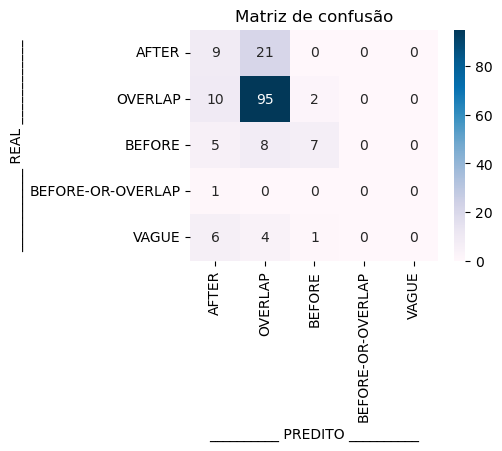

In [189]:
tb.tr.cm()

In [190]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,2000,OVERLAP,6.0,4.0,10.0,23.0,12.12,40.0


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    OVERLAP          33       95      128          228       26.69   
     BEFORE            3        7       10           10       35.00   
     AFTER            22        9       31           47       11.54   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    OVERLAP                    74.22  
     BEFORE                     70.00  
     AFTER                      29.03

## Votação

In [191]:
tb.tr.processing_type = 'votacao'  # 'primeira_regra' OR 'votacao'

### Sem estratégias

In [192]:
tb.tr.active_tlink_candidate  = False
tb.tr.active_tlink_transitive = False
tb.tr.tlink_candidate.approach = 'ML'  # 'REGRAS_TREE', 'ML' or 'REGRAS'
tb.tr.tlink_candidate.threshold = 0.3

#processa todas as sentenças da task 'A'
tb.tr.process_rules()
tb.tr.status()

STATUS PROCESSAMENTO:
Task:                       A
Quant. Regras Ativas:       797
Ordenada por:               
Ordem reversa:              False
Tipo Processamento:         votacao
Tlink Candidato Ativo?      False
Tlink Transitivo Ativo?     False
Tlink Candidato Approach:   
Tlink Candidato Threshold:  
Regras processadas?         SIM


#### Treino

In [193]:
#Resumo do processamento
tb.tr.show_result = 'train'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE ['train', 'train_test']
STATUS: VOTACAO | 797 regras ativas | (['train', 'train_test'])
	Sem Pares Candidato | Sem Fechamento
Acurácia Anotadas:       1250.0 de  1440.0 (86.8%)
Total Não Anotadas:                 1640.0
Acurácia Não Anotadas:   1250.0 de  3080.0 (40.6%)

TAXA COBERTURA:          1440.0 de 1,440.0 (100.0%)

Quant Regras Processadas:  626
Total Sentenças Anotadas Task A:   645
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  1440
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.935     0.873     0.903       361
           BEFORE      0.953     0.581     0.722       279
BEFORE-OR-OVERLAP      0.000     0.000     0.000         1
          OVERLAP      0.828     0.992     0.903       777
 OVERLAP-OR-AFTER      0.000     0.000     0.000         1
            VAGUE      1.000     0.095     0.174        21

         accuracy                          0.868      1440
        macro avg      0.619     0.423     0.450      1440
     weighted avg      0.880     0.868     0.856      1440



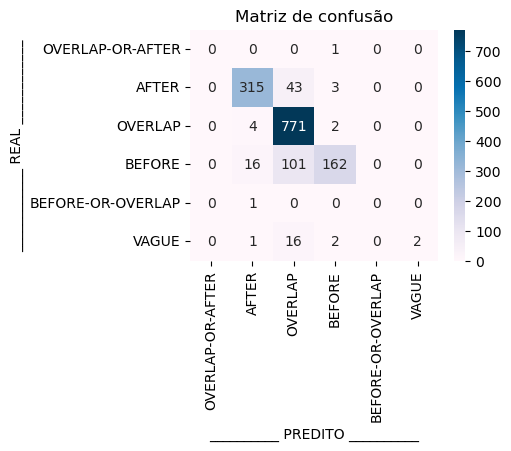

In [194]:
tb.tr.cm()

In [195]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,2000,OVERLAP,108.0,45.0,153.0,119.0,16.54,29.41


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    VAGUE           0.0      2.0      2.0          0.0      100.00   
     BEFORE          8.0    162.0    170.0         83.0       64.03   
     AFTER          22.0    315.0    337.0        202.0       58.44   
     OVERLAP       160.0    771.0    931.0       1355.0       33.73   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    VAGUE                     100.00  
     BEFORE                     95.29  
     AFTER                      93.47  
     OVERLAP                    82.81

#### Teste

In [196]:
#Resumo do processamento
tb.tr.show_result = 'test'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE test
STATUS: VOTACAO | 797 regras ativas | (test)
	Sem Pares Candidato | Sem Fechamento
Acurácia Anotadas:       115.0 de   169.0 (68.0%)
Total Não Anotadas:                  285.0
Acurácia Não Anotadas:   115.0 de   454.0 (25.3%)

TAXA COBERTURA:          169.0 de   169.0 (100.0%)

Quant Regras Processadas:  204
Total Sentenças Anotadas Task A:   81
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  169
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.346     0.300     0.321        30
           BEFORE      0.875     0.350     0.500        20
BEFORE-OR-OVERLAP      0.000     0.000     0.000         1
          OVERLAP      0.733     0.925     0.818       107
            VAGUE      0.000     0.000     0.000        11

         accuracy                          0.680       169
        macro avg      0.391     0.315     0.328       169
     weighted avg      0.629     0.680     0.634       169



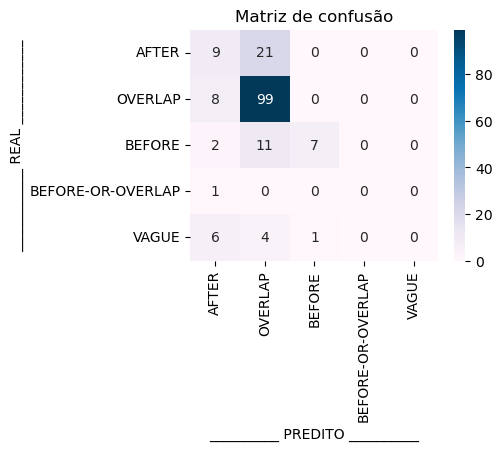

In [197]:
tb.tr.cm()

In [198]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,2000,OVERLAP,6.0,4.0,10.0,23.0,12.12,40.0


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    BEFORE            1        7        8            5       53.85   
     OVERLAP          36       99      135          245       26.05   
     AFTER            17        9       26           35       14.75   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    BEFORE                     87.50  
     OVERLAP                    73.33  
     AFTER                      34.62

### +Fechamento Temporal

In [199]:
tb.tr.active_tlink_candidate  = False
tb.tr.active_tlink_transitive = True
tb.tr.tlink_candidate.approach = 'ML'  # 'REGRAS_TREE', 'ML' or 'REGRAS'
tb.tr.tlink_candidate.threshold = 0.3

#processa todas as sentenças da task 'A'
tb.tr.process_rules()
tb.tr.status()

STATUS PROCESSAMENTO:
Task:                       A
Quant. Regras Ativas:       797
Ordenada por:               
Ordem reversa:              False
Tipo Processamento:         votacao
Tlink Candidato Ativo?      False
Tlink Transitivo Ativo?     True
Tlink Candidato Approach:   
Tlink Candidato Threshold:  
Regras processadas?         SIM


#### Treino

In [200]:
#Resumo do processamento
tb.tr.show_result = 'train'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE ['train', 'train_test']
STATUS: VOTACAO | 797 regras ativas | (['train', 'train_test'])
	Sem Pares Candidato | Fechamento
Acurácia Anotadas:       1250.0 de  1440.0 (86.8%)
Total Não Anotadas:                 1640.0
Acurácia Não Anotadas:   1250.0 de  3080.0 (40.6%)

TAXA COBERTURA:          1440.0 de 1,440.0 (100.0%)

Quant Regras Processadas:  626
Total Sentenças Anotadas Task A:   645
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  1440
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.935     0.873     0.903       361
           BEFORE      0.953     0.581     0.722       279
BEFORE-OR-OVERLAP      0.000     0.000     0.000         1
          OVERLAP      0.828     0.992     0.903       777
 OVERLAP-OR-AFTER      0.000     0.000     0.000         1
            VAGUE      1.000     0.095     0.174        21

         accuracy                          0.868      1440
        macro avg      0.619     0.423     0.450      1440
     weighted avg      0.880     0.868     0.856      1440



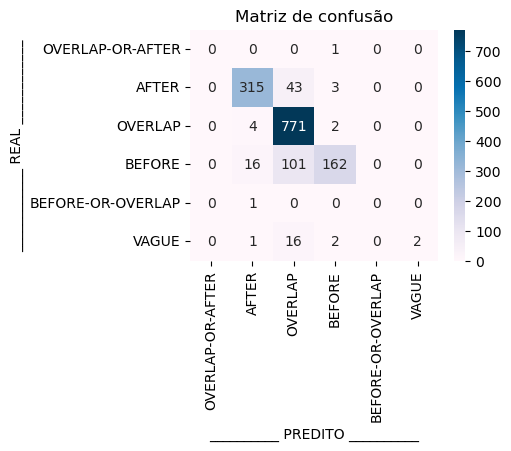

In [201]:
tb.tr.cm()

#### Teste

In [202]:
#Resumo do processamento
tb.tr.show_result = 'test'
tb.tr.process_resume()

RESUMO PROCESSAMENTO DO DADOS DE test
STATUS: VOTACAO | 797 regras ativas | (test)
	Sem Pares Candidato | Fechamento
Acurácia Anotadas:       115.0 de   169.0 (68.0%)
Total Não Anotadas:                  285.0
Acurácia Não Anotadas:   115.0 de   454.0 (25.3%)

TAXA COBERTURA:          169.0 de   169.0 (100.0%)

Quant Regras Processadas:  204
Total Sentenças Anotadas Task A:   81
Total Sentenças Anotadas sem predição:  0
Total Relações Anotadas Task A:  169
Total Relações Anotadas sem predição:  0






                   precision    recall  f1-score   support

            AFTER      0.346     0.300     0.321        30
           BEFORE      0.875     0.350     0.500        20
BEFORE-OR-OVERLAP      0.000     0.000     0.000         1
          OVERLAP      0.733     0.925     0.818       107
            VAGUE      0.000     0.000     0.000        11

         accuracy                          0.680       169
        macro avg      0.391     0.315     0.328       169
     weighted avg      0.629     0.680     0.634       169



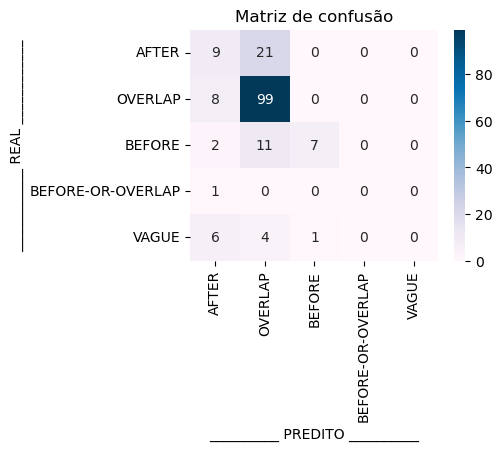

In [203]:
tb.tr.cm()

In [204]:
display(tb.tr.df_resultado_por_regras.sort_index().tail(1), tb.tr.df_resultado_por_classe)

,,Resultado,Erros,Acertos,Anotado,Não Anotado,pct_acerto,pct_acerto_anotado
task,rule,relType_pred,,,,,,
A,2000,OVERLAP,6.0,4.0,10.0,23.0,12.12,40.0


Resultado          Erros  Acertos  Anotado  Não Anotado  pct_acerto  \
task relType_pred                                                     
A    BEFORE            1        7        8            5       53.85   
     OVERLAP          36       99      135          245       26.05   
     AFTER            17        9       26           35       14.75   

Resultado          pct_acerto_anotado  
task relType_pred                      
A    BEFORE                     87.50  
     OVERLAP                    73.33  
     AFTER                      34.62

In [205]:
print('TEMPO TOTAL:', (time.time() - ini) / 60, 'min')

TEMPO TOTAL: 200.6360620180766 min
